In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from models.GenerativeAdversarialNetwork import GenerativeAdversarialNetwork
from utils.loaders import load_safari

Using TensorFlow backend.


In [3]:
# run params
SECTION = 'gan'
RUN_ID = '0001'
DATA_NAME = 'camel'
RUN_FOLDER = f'run/{SECTION}/'
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'sampled_images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

mode = 'build' #'load' #

## Data

In [4]:
(x_train, y_train) = load_safari(DATA_NAME)

In [5]:
x_train.shape

(80000, 28, 28, 1)

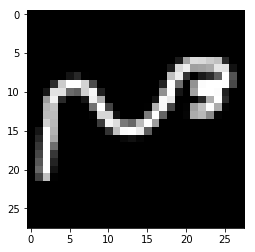

In [6]:
plt.imshow(x_train[200,:,:,0], cmap = 'gray')

## Model

In [7]:
image_dim = (28, 28, 1)
latent_dim = 100

In [8]:
generator_initial_dim = (7, 7, 64)
generator_activation = 'relu'
discriminator_activation = 'relu'
use_batch_norm = True
discriminator_learning_rate = 0.0008,
generator_learning_rate = 0.0004,
generator_batch_norm_momentum = 0.9
discriminator_batch_norm_momentum = None
use_drop_out = True
discriminator_dense_dim = 0
generator_dropout_rate = None
discriminator_dropout_rate = .4
generator_convolutional_params = [
    {'strides': (1, 1), 'filters': 128, 'kernel_size': (5, 5), 'upsample': 2, },
    {'strides': (1, 1), 'filters': 64, 'kernel_size': (5, 5), 'upsample': 2, },
    {'strides': (1, 1), 'filters': 64, 'kernel_size': (5, 5), 'upsample': 1, },
    {'strides': (1, 1), 'filters': 1, 'kernel_size': (5, 5), 'upsample': 1, },
    ]
discriminator_convolutional_params = [
    {'strides': (2, 2), 'filters': 64, 'kernel_size': (5, 5),},
    {'strides': (2, 2), 'filters': 64, 'kernel_size': (5, 5),},
    {'strides': (2, 2), 'filters': 128, 'kernel_size': (5, 5),},
    {'strides': (1, 1), 'filters': 128, 'kernel_size': (5, 5),},
    ]

In [9]:
gan = GenerativeAdversarialNetwork(
    image_dim=image_dim,
    latent_dim=latent_dim,
    generator_initial_dim=generator_initial_dim,
    discriminator_dense_dim=discriminator_dense_dim,
    generator_activation=generator_activation,
    discriminator_activation=discriminator_activation,
    generator_convolutional_params=generator_convolutional_params,
    discriminator_learning_rate = discriminator_learning_rate,
    generator_learning_rate = generator_learning_rate,
    discriminator_convolutional_params=discriminator_convolutional_params,
    generator_batch_norm_momentum=generator_batch_norm_momentum,
    discriminator_batch_norm_momentum=discriminator_batch_norm_momentum,
    generator_dropout_rate=generator_dropout_rate,
    discriminator_dropout_rate=discriminator_dropout_rate,
    
    )

W0604 15:31:34.255031 4321379200 deprecation.py:323] From /Users/comadan/venv/generative_deep_learning/lib/python3.6/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [10]:
gan.generator_model.summary()

Model: "generator_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3136)              316736    
_________________________________________________________________
batch_normalization_1 (Batch (None, 3136)              12544     
_________________________________________________________________
activation_1 (Activation)    (None, 3136)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 64)        0         
_________________________________________________________________
generator_conv2d_0 (Conv2D)  (None, 14, 14, 128)   

In [11]:
gan.discriminator_model.summary()

Model: "discriminator_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
discriminator_input (InputLa (None, 28, 28, 1)         0         
_________________________________________________________________
discriminator_conv2d_0 (Conv (None, 14, 14, 64)        1664      
_________________________________________________________________
activation_5 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
discriminator_conv2d_1 (Conv (None, 7, 7, 64)          102464    
_________________________________________________________________
activation_6 (Activation)    (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 64)  

In [12]:
gan.adversarial_model.summary()

Model: "adversarial_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
adversarial_input (InputLaye (None, 100)               0         
_________________________________________________________________
generator_model (Model)      (None, 28, 28, 1)         844161    
_________________________________________________________________
discriminator_model (Model)  (None, 1)                 720833    
Total params: 844,161
Trainable params: 837,377
Non-trainable params: 6,784
_________________________________________________________________


/Users/comadan/venv/generative_deep_learning/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


## Training

In [13]:
BATCH_SIZE = 64
EPOCHS = 6000
PRINT_EVERY_N_BATCHES = 5

In [14]:
gan.train(     
    x_train
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
)

W0604 15:31:34.908879 4321379200 deprecation_wrapper.py:119] From /Users/comadan/venv/generative_deep_learning/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.

/Users/comadan/venv/generative_deep_learning/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


epoch: 0  disc. loss: (v: 0.689 g: 0.693) acc.: (v: 0.984 g: 0.984)  gen. loss:0.416 acc.: 1.000


/Users/comadan/venv/generative_deep_learning/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


epoch: 1  disc. loss: (v: 0.126 g: 1.006) acc.: (v: 1.000 g: 0.000)  gen. loss:0.670 acc.: 0.953
epoch: 2  disc. loss: (v: 0.106 g: 0.691) acc.: (v: 1.000 g: 1.000)  gen. loss:0.031 acc.: 1.000
epoch: 3  disc. loss: (v: 0.000 g: 4.390) acc.: (v: 1.000 g: 0.000)  gen. loss:0.589 acc.: 0.984
epoch: 4  disc. loss: (v: 0.241 g: 0.746) acc.: (v: 1.000 g: 0.109)  gen. loss:0.348 acc.: 1.000
epoch: 5  disc. loss: (v: 0.071 g: 1.799) acc.: (v: 1.000 g: 0.000)  gen. loss:0.684 acc.: 0.531
epoch: 6  disc. loss: (v: 0.657 g: 0.730) acc.: (v: 1.000 g: 0.109)  gen. loss:0.666 acc.: 0.719
epoch: 7  disc. loss: (v: 0.651 g: 0.724) acc.: (v: 1.000 g: 0.000)  gen. loss:0.672 acc.: 0.781
epoch: 8  disc. loss: (v: 0.662 g: 0.692) acc.: (v: 0.969 g: 0.766)  gen. loss:0.668 acc.: 0.828
epoch: 9  disc. loss: (v: 0.659 g: 0.666) acc.: (v: 0.906 g: 1.000)  gen. loss:0.666 acc.: 0.797
epoch: 10  disc. loss: (v: 0.682 g: 0.589) acc.: (v: 0.609 g: 1.000)  gen. loss:0.634 acc.: 0.859
epoch: 11  disc. loss: (v: 0.

epoch: 85  disc. loss: (v: 0.208 g: 0.707) acc.: (v: 0.984 g: 0.484)  gen. loss:1.410 acc.: 0.000
epoch: 86  disc. loss: (v: 0.826 g: 0.282) acc.: (v: 0.438 g: 1.000)  gen. loss:0.330 acc.: 0.969
epoch: 87  disc. loss: (v: 0.058 g: 1.369) acc.: (v: 1.000 g: 0.000)  gen. loss:1.607 acc.: 0.000
epoch: 88  disc. loss: (v: 1.140 g: 0.264) acc.: (v: 0.016 g: 1.000)  gen. loss:0.762 acc.: 0.391
epoch: 89  disc. loss: (v: 0.382 g: 0.657) acc.: (v: 0.891 g: 0.641)  gen. loss:0.887 acc.: 0.125
epoch: 90  disc. loss: (v: 0.426 g: 0.547) acc.: (v: 0.828 g: 0.938)  gen. loss:0.863 acc.: 0.188
epoch: 91  disc. loss: (v: 0.365 g: 0.577) acc.: (v: 0.906 g: 0.922)  gen. loss:1.109 acc.: 0.000
epoch: 92  disc. loss: (v: 0.487 g: 0.401) acc.: (v: 0.812 g: 1.000)  gen. loss:0.455 acc.: 0.891
epoch: 93  disc. loss: (v: 0.158 g: 1.118) acc.: (v: 0.984 g: 0.047)  gen. loss:1.771 acc.: 0.000
epoch: 94  disc. loss: (v: 1.377 g: 0.241) acc.: (v: 0.000 g: 1.000)  gen. loss:0.681 acc.: 0.516
epoch: 95  disc. los

epoch: 168  disc. loss: (v: 0.505 g: 0.774) acc.: (v: 0.938 g: 0.281)  gen. loss:1.332 acc.: 0.000
epoch: 169  disc. loss: (v: 0.772 g: 0.594) acc.: (v: 0.344 g: 0.828)  gen. loss:0.628 acc.: 0.688
epoch: 170  disc. loss: (v: 0.487 g: 0.849) acc.: (v: 0.969 g: 0.156)  gen. loss:0.929 acc.: 0.062
epoch: 171  disc. loss: (v: 0.664 g: 0.562) acc.: (v: 0.594 g: 0.844)  gen. loss:0.773 acc.: 0.375
epoch: 172  disc. loss: (v: 0.476 g: 0.700) acc.: (v: 0.922 g: 0.500)  gen. loss:1.259 acc.: 0.000
epoch: 173  disc. loss: (v: 0.815 g: 0.444) acc.: (v: 0.391 g: 0.969)  gen. loss:0.373 acc.: 0.984
epoch: 174  disc. loss: (v: 0.241 g: 1.408) acc.: (v: 1.000 g: 0.000)  gen. loss:1.129 acc.: 0.000
epoch: 175  disc. loss: (v: 0.987 g: 0.401) acc.: (v: 0.000 g: 1.000)  gen. loss:0.747 acc.: 0.297
epoch: 176  disc. loss: (v: 0.603 g: 0.696) acc.: (v: 0.781 g: 0.516)  gen. loss:0.775 acc.: 0.266
epoch: 177  disc. loss: (v: 0.638 g: 0.656) acc.: (v: 0.641 g: 0.688)  gen. loss:0.902 acc.: 0.062
epoch: 178

epoch: 251  disc. loss: (v: 0.608 g: 0.563) acc.: (v: 0.719 g: 0.891)  gen. loss:0.660 acc.: 0.547
epoch: 252  disc. loss: (v: 0.318 g: 0.909) acc.: (v: 1.000 g: 0.141)  gen. loss:1.218 acc.: 0.000
epoch: 253  disc. loss: (v: 0.827 g: 0.412) acc.: (v: 0.250 g: 1.000)  gen. loss:0.679 acc.: 0.516
epoch: 254  disc. loss: (v: 0.407 g: 0.821) acc.: (v: 0.938 g: 0.375)  gen. loss:1.169 acc.: 0.047
epoch: 255  disc. loss: (v: 0.654 g: 0.493) acc.: (v: 0.625 g: 0.938)  gen. loss:0.636 acc.: 0.562
epoch: 256  disc. loss: (v: 0.353 g: 0.947) acc.: (v: 0.984 g: 0.156)  gen. loss:1.242 acc.: 0.000
epoch: 257  disc. loss: (v: 0.817 g: 0.416) acc.: (v: 0.250 g: 0.984)  gen. loss:0.715 acc.: 0.500
epoch: 258  disc. loss: (v: 0.402 g: 0.803) acc.: (v: 0.969 g: 0.281)  gen. loss:0.999 acc.: 0.125
epoch: 259  disc. loss: (v: 0.606 g: 0.515) acc.: (v: 0.719 g: 0.922)  gen. loss:0.698 acc.: 0.531
epoch: 260  disc. loss: (v: 0.402 g: 0.698) acc.: (v: 0.953 g: 0.469)  gen. loss:1.126 acc.: 0.078
epoch: 261

epoch: 334  disc. loss: (v: 0.816 g: 0.389) acc.: (v: 0.312 g: 0.969)  gen. loss:0.759 acc.: 0.469
epoch: 335  disc. loss: (v: 0.420 g: 0.660) acc.: (v: 0.953 g: 0.625)  gen. loss:0.970 acc.: 0.219
epoch: 336  disc. loss: (v: 0.529 g: 0.525) acc.: (v: 0.812 g: 0.891)  gen. loss:0.868 acc.: 0.328
epoch: 337  disc. loss: (v: 0.393 g: 0.655) acc.: (v: 0.906 g: 0.609)  gen. loss:1.278 acc.: 0.016
epoch: 338  disc. loss: (v: 0.820 g: 0.374) acc.: (v: 0.312 g: 1.000)  gen. loss:0.618 acc.: 0.625
epoch: 339  disc. loss: (v: 0.227 g: 0.912) acc.: (v: 0.984 g: 0.219)  gen. loss:1.369 acc.: 0.047
epoch: 340  disc. loss: (v: 0.665 g: 0.316) acc.: (v: 0.500 g: 1.000)  gen. loss:0.691 acc.: 0.594
epoch: 341  disc. loss: (v: 0.305 g: 0.795) acc.: (v: 0.891 g: 0.406)  gen. loss:1.504 acc.: 0.016
epoch: 342  disc. loss: (v: 0.757 g: 0.374) acc.: (v: 0.469 g: 0.938)  gen. loss:0.640 acc.: 0.656
epoch: 343  disc. loss: (v: 0.300 g: 0.920) acc.: (v: 0.938 g: 0.219)  gen. loss:1.399 acc.: 0.047
epoch: 344

epoch: 417  disc. loss: (v: 0.479 g: 0.498) acc.: (v: 0.812 g: 0.859)  gen. loss:1.394 acc.: 0.094
epoch: 418  disc. loss: (v: 0.561 g: 0.429) acc.: (v: 0.688 g: 0.891)  gen. loss:1.255 acc.: 0.156
epoch: 419  disc. loss: (v: 0.476 g: 0.481) acc.: (v: 0.875 g: 0.781)  gen. loss:0.881 acc.: 0.359
epoch: 420  disc. loss: (v: 0.309 g: 0.730) acc.: (v: 0.938 g: 0.547)  gen. loss:2.038 acc.: 0.000
epoch: 421  disc. loss: (v: 1.245 g: 0.147) acc.: (v: 0.203 g: 1.000)  gen. loss:0.378 acc.: 0.891
epoch: 422  disc. loss: (v: 0.160 g: 1.442) acc.: (v: 0.984 g: 0.047)  gen. loss:1.215 acc.: 0.109
epoch: 423  disc. loss: (v: 0.758 g: 0.386) acc.: (v: 0.375 g: 0.938)  gen. loss:0.964 acc.: 0.219
epoch: 424  disc. loss: (v: 0.597 g: 0.505) acc.: (v: 0.656 g: 0.844)  gen. loss:0.913 acc.: 0.250
epoch: 425  disc. loss: (v: 0.593 g: 0.589) acc.: (v: 0.609 g: 0.750)  gen. loss:0.843 acc.: 0.359
epoch: 426  disc. loss: (v: 0.470 g: 0.505) acc.: (v: 0.875 g: 0.844)  gen. loss:1.032 acc.: 0.172
epoch: 427

epoch: 500  disc. loss: (v: 0.355 g: 0.601) acc.: (v: 0.891 g: 0.688)  gen. loss:1.573 acc.: 0.078
epoch: 501  disc. loss: (v: 0.525 g: 0.413) acc.: (v: 0.734 g: 0.906)  gen. loss:1.217 acc.: 0.156
epoch: 502  disc. loss: (v: 0.499 g: 0.472) acc.: (v: 0.766 g: 0.812)  gen. loss:1.366 acc.: 0.141
epoch: 503  disc. loss: (v: 0.551 g: 0.357) acc.: (v: 0.672 g: 0.922)  gen. loss:1.293 acc.: 0.172
epoch: 504  disc. loss: (v: 0.440 g: 0.442) acc.: (v: 0.797 g: 0.859)  gen. loss:1.541 acc.: 0.094
epoch: 505  disc. loss: (v: 0.569 g: 0.391) acc.: (v: 0.719 g: 0.938)  gen. loss:1.299 acc.: 0.234
epoch: 506  disc. loss: (v: 0.473 g: 0.428) acc.: (v: 0.812 g: 0.859)  gen. loss:1.636 acc.: 0.062
epoch: 507  disc. loss: (v: 0.793 g: 0.249) acc.: (v: 0.484 g: 0.984)  gen. loss:0.482 acc.: 0.828
epoch: 508  disc. loss: (v: 0.146 g: 1.331) acc.: (v: 1.000 g: 0.078)  gen. loss:1.679 acc.: 0.016
epoch: 509  disc. loss: (v: 0.909 g: 0.224) acc.: (v: 0.328 g: 1.000)  gen. loss:0.714 acc.: 0.562
epoch: 510

epoch: 583  disc. loss: (v: 0.620 g: 0.384) acc.: (v: 0.562 g: 0.906)  gen. loss:1.059 acc.: 0.297
epoch: 584  disc. loss: (v: 0.394 g: 0.436) acc.: (v: 0.875 g: 0.922)  gen. loss:1.456 acc.: 0.188
epoch: 585  disc. loss: (v: 0.695 g: 0.259) acc.: (v: 0.609 g: 0.969)  gen. loss:0.684 acc.: 0.562
epoch: 586  disc. loss: (v: 0.238 g: 0.940) acc.: (v: 1.000 g: 0.281)  gen. loss:1.810 acc.: 0.031
epoch: 587  disc. loss: (v: 1.060 g: 0.221) acc.: (v: 0.172 g: 1.000)  gen. loss:0.741 acc.: 0.531
epoch: 588  disc. loss: (v: 0.244 g: 0.848) acc.: (v: 1.000 g: 0.406)  gen. loss:1.192 acc.: 0.219
epoch: 589  disc. loss: (v: 0.594 g: 0.623) acc.: (v: 0.594 g: 0.672)  gen. loss:1.105 acc.: 0.266
epoch: 590  disc. loss: (v: 0.577 g: 0.419) acc.: (v: 0.688 g: 0.922)  gen. loss:1.009 acc.: 0.297
epoch: 591  disc. loss: (v: 0.563 g: 0.469) acc.: (v: 0.719 g: 0.875)  gen. loss:1.212 acc.: 0.141
epoch: 592  disc. loss: (v: 0.540 g: 0.355) acc.: (v: 0.750 g: 0.922)  gen. loss:1.199 acc.: 0.234
epoch: 593

epoch: 666  disc. loss: (v: 0.465 g: 0.519) acc.: (v: 0.797 g: 0.797)  gen. loss:1.258 acc.: 0.125
epoch: 667  disc. loss: (v: 0.583 g: 0.315) acc.: (v: 0.750 g: 0.969)  gen. loss:1.102 acc.: 0.141
epoch: 668  disc. loss: (v: 0.457 g: 0.405) acc.: (v: 0.750 g: 0.922)  gen. loss:1.793 acc.: 0.047
epoch: 669  disc. loss: (v: 0.865 g: 0.182) acc.: (v: 0.375 g: 0.984)  gen. loss:0.610 acc.: 0.625
epoch: 670  disc. loss: (v: 0.197 g: 0.933) acc.: (v: 0.969 g: 0.234)  gen. loss:1.526 acc.: 0.047
epoch: 671  disc. loss: (v: 0.751 g: 0.309) acc.: (v: 0.469 g: 0.938)  gen. loss:0.741 acc.: 0.562
epoch: 672  disc. loss: (v: 0.340 g: 0.607) acc.: (v: 0.875 g: 0.703)  gen. loss:1.383 acc.: 0.109
epoch: 673  disc. loss: (v: 0.536 g: 0.383) acc.: (v: 0.703 g: 0.953)  gen. loss:1.254 acc.: 0.156
epoch: 674  disc. loss: (v: 0.450 g: 0.323) acc.: (v: 0.812 g: 1.000)  gen. loss:1.193 acc.: 0.234
epoch: 675  disc. loss: (v: 0.561 g: 0.302) acc.: (v: 0.625 g: 0.953)  gen. loss:1.190 acc.: 0.203
epoch: 676

epoch: 749  disc. loss: (v: 0.609 g: 0.344) acc.: (v: 0.625 g: 0.969)  gen. loss:0.863 acc.: 0.391
epoch: 750  disc. loss: (v: 0.294 g: 0.568) acc.: (v: 0.891 g: 0.672)  gen. loss:1.731 acc.: 0.031
epoch: 751  disc. loss: (v: 0.994 g: 0.211) acc.: (v: 0.266 g: 1.000)  gen. loss:0.701 acc.: 0.578
epoch: 752  disc. loss: (v: 0.193 g: 0.944) acc.: (v: 1.000 g: 0.281)  gen. loss:1.160 acc.: 0.203
epoch: 753  disc. loss: (v: 0.698 g: 0.457) acc.: (v: 0.484 g: 0.859)  gen. loss:1.123 acc.: 0.234
epoch: 754  disc. loss: (v: 0.517 g: 0.469) acc.: (v: 0.703 g: 0.906)  gen. loss:1.098 acc.: 0.219
epoch: 755  disc. loss: (v: 0.554 g: 0.376) acc.: (v: 0.688 g: 0.953)  gen. loss:1.274 acc.: 0.172
epoch: 756  disc. loss: (v: 0.585 g: 0.323) acc.: (v: 0.656 g: 0.953)  gen. loss:0.868 acc.: 0.391
epoch: 757  disc. loss: (v: 0.297 g: 0.570) acc.: (v: 0.938 g: 0.781)  gen. loss:1.556 acc.: 0.094
epoch: 758  disc. loss: (v: 0.614 g: 0.290) acc.: (v: 0.641 g: 0.984)  gen. loss:0.868 acc.: 0.359
epoch: 759

epoch: 832  disc. loss: (v: 0.366 g: 0.538) acc.: (v: 0.875 g: 0.797)  gen. loss:1.671 acc.: 0.078
epoch: 833  disc. loss: (v: 0.733 g: 0.215) acc.: (v: 0.469 g: 1.000)  gen. loss:0.795 acc.: 0.406
epoch: 834  disc. loss: (v: 0.167 g: 0.863) acc.: (v: 0.984 g: 0.469)  gen. loss:1.609 acc.: 0.047
epoch: 835  disc. loss: (v: 0.791 g: 0.250) acc.: (v: 0.422 g: 0.984)  gen. loss:0.951 acc.: 0.297
epoch: 836  disc. loss: (v: 0.385 g: 0.480) acc.: (v: 0.891 g: 0.844)  gen. loss:1.275 acc.: 0.125
epoch: 837  disc. loss: (v: 0.793 g: 0.296) acc.: (v: 0.438 g: 0.969)  gen. loss:0.925 acc.: 0.375
epoch: 838  disc. loss: (v: 0.437 g: 0.465) acc.: (v: 0.812 g: 0.875)  gen. loss:1.225 acc.: 0.172
epoch: 839  disc. loss: (v: 0.481 g: 0.346) acc.: (v: 0.781 g: 0.984)  gen. loss:1.116 acc.: 0.266
epoch: 840  disc. loss: (v: 0.369 g: 0.425) acc.: (v: 0.906 g: 0.875)  gen. loss:1.521 acc.: 0.078
epoch: 841  disc. loss: (v: 0.580 g: 0.239) acc.: (v: 0.656 g: 1.000)  gen. loss:1.631 acc.: 0.094
epoch: 842

epoch: 915  disc. loss: (v: 0.237 g: 0.750) acc.: (v: 0.938 g: 0.516)  gen. loss:1.242 acc.: 0.188
epoch: 916  disc. loss: (v: 0.540 g: 0.381) acc.: (v: 0.719 g: 0.922)  gen. loss:1.317 acc.: 0.094
epoch: 917  disc. loss: (v: 0.437 g: 0.334) acc.: (v: 0.797 g: 0.969)  gen. loss:1.263 acc.: 0.125
epoch: 918  disc. loss: (v: 0.382 g: 0.410) acc.: (v: 0.797 g: 0.891)  gen. loss:1.465 acc.: 0.141
epoch: 919  disc. loss: (v: 0.652 g: 0.241) acc.: (v: 0.641 g: 0.984)  gen. loss:0.968 acc.: 0.391
epoch: 920  disc. loss: (v: 0.315 g: 0.440) acc.: (v: 0.922 g: 0.891)  gen. loss:1.686 acc.: 0.047
epoch: 921  disc. loss: (v: 0.681 g: 0.228) acc.: (v: 0.531 g: 0.984)  gen. loss:0.839 acc.: 0.406
epoch: 922  disc. loss: (v: 0.246 g: 0.720) acc.: (v: 0.953 g: 0.562)  gen. loss:1.903 acc.: 0.016
epoch: 923  disc. loss: (v: 0.782 g: 0.181) acc.: (v: 0.453 g: 1.000)  gen. loss:0.748 acc.: 0.516
epoch: 924  disc. loss: (v: 0.233 g: 0.720) acc.: (v: 0.938 g: 0.609)  gen. loss:1.558 acc.: 0.078
epoch: 925

epoch: 998  disc. loss: (v: 1.818 g: 0.095) acc.: (v: 0.062 g: 1.000)  gen. loss:0.711 acc.: 0.500
epoch: 999  disc. loss: (v: 0.261 g: 0.692) acc.: (v: 0.953 g: 0.547)  gen. loss:1.356 acc.: 0.047
epoch: 1000  disc. loss: (v: 0.631 g: 0.295) acc.: (v: 0.609 g: 0.984)  gen. loss:1.127 acc.: 0.188
epoch: 1001  disc. loss: (v: 0.373 g: 0.428) acc.: (v: 0.844 g: 0.891)  gen. loss:1.347 acc.: 0.172
epoch: 1002  disc. loss: (v: 0.547 g: 0.295) acc.: (v: 0.625 g: 1.000)  gen. loss:1.228 acc.: 0.203
epoch: 1003  disc. loss: (v: 0.443 g: 0.382) acc.: (v: 0.797 g: 0.875)  gen. loss:1.153 acc.: 0.281
epoch: 1004  disc. loss: (v: 0.423 g: 0.405) acc.: (v: 0.812 g: 0.859)  gen. loss:1.289 acc.: 0.141
epoch: 1005  disc. loss: (v: 0.438 g: 0.403) acc.: (v: 0.859 g: 0.906)  gen. loss:1.396 acc.: 0.156
epoch: 1006  disc. loss: (v: 0.446 g: 0.282) acc.: (v: 0.766 g: 1.000)  gen. loss:1.045 acc.: 0.266
epoch: 1007  disc. loss: (v: 0.298 g: 0.529) acc.: (v: 0.906 g: 0.750)  gen. loss:1.721 acc.: 0.078
ep

epoch: 1080  disc. loss: (v: 0.209 g: 0.489) acc.: (v: 0.969 g: 0.844)  gen. loss:1.551 acc.: 0.094
epoch: 1081  disc. loss: (v: 0.609 g: 0.229) acc.: (v: 0.578 g: 1.000)  gen. loss:0.963 acc.: 0.406
epoch: 1082  disc. loss: (v: 0.236 g: 0.522) acc.: (v: 0.953 g: 0.797)  gen. loss:2.200 acc.: 0.031
epoch: 1083  disc. loss: (v: 0.822 g: 0.186) acc.: (v: 0.453 g: 1.000)  gen. loss:0.859 acc.: 0.484
epoch: 1084  disc. loss: (v: 0.213 g: 0.662) acc.: (v: 0.953 g: 0.625)  gen. loss:1.824 acc.: 0.031
epoch: 1085  disc. loss: (v: 0.907 g: 0.185) acc.: (v: 0.391 g: 1.000)  gen. loss:0.918 acc.: 0.438
epoch: 1086  disc. loss: (v: 0.309 g: 0.541) acc.: (v: 0.906 g: 0.734)  gen. loss:1.387 acc.: 0.109
epoch: 1087  disc. loss: (v: 0.435 g: 0.319) acc.: (v: 0.781 g: 0.969)  gen. loss:1.400 acc.: 0.203
epoch: 1088  disc. loss: (v: 0.372 g: 0.341) acc.: (v: 0.859 g: 0.938)  gen. loss:1.569 acc.: 0.047
epoch: 1089  disc. loss: (v: 0.516 g: 0.224) acc.: (v: 0.688 g: 1.000)  gen. loss:1.255 acc.: 0.203


epoch: 1162  disc. loss: (v: 0.488 g: 0.232) acc.: (v: 0.719 g: 0.953)  gen. loss:1.178 acc.: 0.312
epoch: 1163  disc. loss: (v: 0.425 g: 0.369) acc.: (v: 0.766 g: 0.844)  gen. loss:1.884 acc.: 0.047
epoch: 1164  disc. loss: (v: 0.520 g: 0.231) acc.: (v: 0.766 g: 1.000)  gen. loss:1.548 acc.: 0.141
epoch: 1165  disc. loss: (v: 0.401 g: 0.355) acc.: (v: 0.797 g: 0.906)  gen. loss:1.721 acc.: 0.125
epoch: 1166  disc. loss: (v: 0.425 g: 0.194) acc.: (v: 0.812 g: 1.000)  gen. loss:1.212 acc.: 0.250
epoch: 1167  disc. loss: (v: 0.296 g: 0.444) acc.: (v: 0.906 g: 0.828)  gen. loss:1.852 acc.: 0.062
epoch: 1168  disc. loss: (v: 0.514 g: 0.254) acc.: (v: 0.688 g: 0.984)  gen. loss:1.473 acc.: 0.219
epoch: 1169  disc. loss: (v: 0.347 g: 0.355) acc.: (v: 0.875 g: 0.844)  gen. loss:1.869 acc.: 0.094
epoch: 1170  disc. loss: (v: 0.537 g: 0.182) acc.: (v: 0.656 g: 0.984)  gen. loss:0.572 acc.: 0.688
epoch: 1171  disc. loss: (v: 0.155 g: 0.709) acc.: (v: 0.969 g: 0.516)  gen. loss:2.955 acc.: 0.000


epoch: 1244  disc. loss: (v: 0.933 g: 0.130) acc.: (v: 0.406 g: 0.984)  gen. loss:0.732 acc.: 0.547
epoch: 1245  disc. loss: (v: 0.235 g: 0.633) acc.: (v: 0.953 g: 0.672)  gen. loss:1.566 acc.: 0.109
epoch: 1246  disc. loss: (v: 0.615 g: 0.235) acc.: (v: 0.578 g: 0.984)  gen. loss:1.191 acc.: 0.219
epoch: 1247  disc. loss: (v: 0.375 g: 0.369) acc.: (v: 0.828 g: 0.891)  gen. loss:1.372 acc.: 0.141
epoch: 1248  disc. loss: (v: 0.438 g: 0.296) acc.: (v: 0.766 g: 0.953)  gen. loss:1.460 acc.: 0.109
epoch: 1249  disc. loss: (v: 0.396 g: 0.302) acc.: (v: 0.859 g: 0.984)  gen. loss:1.856 acc.: 0.031
epoch: 1250  disc. loss: (v: 0.692 g: 0.216) acc.: (v: 0.562 g: 1.000)  gen. loss:0.790 acc.: 0.438
epoch: 1251  disc. loss: (v: 0.215 g: 0.897) acc.: (v: 0.953 g: 0.500)  gen. loss:2.029 acc.: 0.031
epoch: 1252  disc. loss: (v: 0.961 g: 0.168) acc.: (v: 0.359 g: 1.000)  gen. loss:0.907 acc.: 0.359
epoch: 1253  disc. loss: (v: 0.306 g: 0.516) acc.: (v: 0.938 g: 0.812)  gen. loss:1.491 acc.: 0.047


epoch: 1326  disc. loss: (v: 0.628 g: 0.296) acc.: (v: 0.547 g: 1.000)  gen. loss:1.255 acc.: 0.219
epoch: 1327  disc. loss: (v: 0.472 g: 0.390) acc.: (v: 0.781 g: 0.938)  gen. loss:1.260 acc.: 0.141
epoch: 1328  disc. loss: (v: 0.444 g: 0.299) acc.: (v: 0.812 g: 0.969)  gen. loss:1.188 acc.: 0.203
epoch: 1329  disc. loss: (v: 0.521 g: 0.336) acc.: (v: 0.688 g: 0.906)  gen. loss:1.553 acc.: 0.062
epoch: 1330  disc. loss: (v: 0.525 g: 0.268) acc.: (v: 0.688 g: 0.953)  gen. loss:1.424 acc.: 0.172
epoch: 1331  disc. loss: (v: 0.415 g: 0.325) acc.: (v: 0.812 g: 0.984)  gen. loss:1.410 acc.: 0.188
epoch: 1332  disc. loss: (v: 0.503 g: 0.262) acc.: (v: 0.750 g: 0.969)  gen. loss:1.093 acc.: 0.312
epoch: 1333  disc. loss: (v: 0.369 g: 0.423) acc.: (v: 0.922 g: 0.859)  gen. loss:2.304 acc.: 0.016
epoch: 1334  disc. loss: (v: 0.892 g: 0.137) acc.: (v: 0.422 g: 1.000)  gen. loss:0.724 acc.: 0.516
epoch: 1335  disc. loss: (v: 0.211 g: 0.727) acc.: (v: 0.969 g: 0.531)  gen. loss:1.427 acc.: 0.109


epoch: 1408  disc. loss: (v: 1.153 g: 0.088) acc.: (v: 0.375 g: 1.000)  gen. loss:0.870 acc.: 0.500
epoch: 1409  disc. loss: (v: 0.307 g: 0.758) acc.: (v: 0.844 g: 0.656)  gen. loss:1.707 acc.: 0.078
epoch: 1410  disc. loss: (v: 0.818 g: 0.215) acc.: (v: 0.453 g: 0.984)  gen. loss:1.068 acc.: 0.312
epoch: 1411  disc. loss: (v: 0.416 g: 0.389) acc.: (v: 0.797 g: 0.891)  gen. loss:1.269 acc.: 0.266
epoch: 1412  disc. loss: (v: 0.525 g: 0.314) acc.: (v: 0.750 g: 0.969)  gen. loss:1.083 acc.: 0.328
epoch: 1413  disc. loss: (v: 0.390 g: 0.393) acc.: (v: 0.875 g: 0.922)  gen. loss:1.624 acc.: 0.062
epoch: 1414  disc. loss: (v: 0.695 g: 0.229) acc.: (v: 0.578 g: 0.969)  gen. loss:1.162 acc.: 0.281
epoch: 1415  disc. loss: (v: 0.448 g: 0.454) acc.: (v: 0.688 g: 0.875)  gen. loss:1.984 acc.: 0.031
epoch: 1416  disc. loss: (v: 0.625 g: 0.237) acc.: (v: 0.656 g: 1.000)  gen. loss:1.025 acc.: 0.312
epoch: 1417  disc. loss: (v: 0.305 g: 0.486) acc.: (v: 0.875 g: 0.828)  gen. loss:1.478 acc.: 0.172


epoch: 1490  disc. loss: (v: 0.407 g: 0.353) acc.: (v: 0.781 g: 0.938)  gen. loss:1.539 acc.: 0.203
epoch: 1491  disc. loss: (v: 0.534 g: 0.279) acc.: (v: 0.672 g: 0.953)  gen. loss:1.425 acc.: 0.188
epoch: 1492  disc. loss: (v: 0.443 g: 0.275) acc.: (v: 0.766 g: 0.969)  gen. loss:1.148 acc.: 0.359
epoch: 1493  disc. loss: (v: 0.319 g: 0.455) acc.: (v: 0.859 g: 0.828)  gen. loss:2.238 acc.: 0.016
epoch: 1494  disc. loss: (v: 1.057 g: 0.148) acc.: (v: 0.266 g: 1.000)  gen. loss:0.763 acc.: 0.453
epoch: 1495  disc. loss: (v: 0.138 g: 0.761) acc.: (v: 1.000 g: 0.453)  gen. loss:1.497 acc.: 0.078
epoch: 1496  disc. loss: (v: 0.643 g: 0.304) acc.: (v: 0.578 g: 0.984)  gen. loss:1.201 acc.: 0.250
epoch: 1497  disc. loss: (v: 0.421 g: 0.412) acc.: (v: 0.797 g: 0.875)  gen. loss:1.203 acc.: 0.234
epoch: 1498  disc. loss: (v: 0.521 g: 0.328) acc.: (v: 0.766 g: 0.984)  gen. loss:1.427 acc.: 0.078
epoch: 1499  disc. loss: (v: 0.581 g: 0.295) acc.: (v: 0.672 g: 0.953)  gen. loss:1.136 acc.: 0.281


epoch: 1572  disc. loss: (v: 0.218 g: 0.744) acc.: (v: 0.953 g: 0.547)  gen. loss:1.900 acc.: 0.031
epoch: 1573  disc. loss: (v: 0.732 g: 0.209) acc.: (v: 0.562 g: 1.000)  gen. loss:1.032 acc.: 0.375
epoch: 1574  disc. loss: (v: 0.317 g: 0.621) acc.: (v: 0.891 g: 0.688)  gen. loss:1.968 acc.: 0.062
epoch: 1575  disc. loss: (v: 0.645 g: 0.229) acc.: (v: 0.609 g: 0.984)  gen. loss:1.088 acc.: 0.219
epoch: 1576  disc. loss: (v: 0.221 g: 0.589) acc.: (v: 0.953 g: 0.672)  gen. loss:1.886 acc.: 0.031
epoch: 1577  disc. loss: (v: 0.721 g: 0.199) acc.: (v: 0.547 g: 0.984)  gen. loss:1.096 acc.: 0.266
epoch: 1578  disc. loss: (v: 0.254 g: 0.491) acc.: (v: 0.984 g: 0.875)  gen. loss:1.862 acc.: 0.062
epoch: 1579  disc. loss: (v: 0.639 g: 0.212) acc.: (v: 0.625 g: 1.000)  gen. loss:0.946 acc.: 0.422
epoch: 1580  disc. loss: (v: 0.312 g: 0.554) acc.: (v: 0.906 g: 0.750)  gen. loss:1.332 acc.: 0.156
epoch: 1581  disc. loss: (v: 0.456 g: 0.316) acc.: (v: 0.781 g: 1.000)  gen. loss:1.169 acc.: 0.250


epoch: 1654  disc. loss: (v: 0.493 g: 0.235) acc.: (v: 0.719 g: 0.984)  gen. loss:1.333 acc.: 0.141
epoch: 1655  disc. loss: (v: 0.446 g: 0.281) acc.: (v: 0.781 g: 0.969)  gen. loss:1.425 acc.: 0.125
epoch: 1656  disc. loss: (v: 0.433 g: 0.289) acc.: (v: 0.797 g: 0.969)  gen. loss:1.182 acc.: 0.328
epoch: 1657  disc. loss: (v: 0.344 g: 0.382) acc.: (v: 0.875 g: 0.844)  gen. loss:1.657 acc.: 0.125
epoch: 1658  disc. loss: (v: 0.446 g: 0.256) acc.: (v: 0.797 g: 0.938)  gen. loss:0.949 acc.: 0.469
epoch: 1659  disc. loss: (v: 0.234 g: 0.696) acc.: (v: 0.922 g: 0.641)  gen. loss:2.408 acc.: 0.016
epoch: 1660  disc. loss: (v: 1.033 g: 0.138) acc.: (v: 0.359 g: 1.000)  gen. loss:0.830 acc.: 0.484
epoch: 1661  disc. loss: (v: 0.202 g: 0.655) acc.: (v: 0.969 g: 0.672)  gen. loss:1.664 acc.: 0.062
epoch: 1662  disc. loss: (v: 0.479 g: 0.296) acc.: (v: 0.781 g: 0.953)  gen. loss:1.228 acc.: 0.266
epoch: 1663  disc. loss: (v: 0.338 g: 0.453) acc.: (v: 0.875 g: 0.812)  gen. loss:1.672 acc.: 0.125


epoch: 1736  disc. loss: (v: 0.254 g: 0.550) acc.: (v: 0.938 g: 0.719)  gen. loss:1.878 acc.: 0.062
epoch: 1737  disc. loss: (v: 0.602 g: 0.193) acc.: (v: 0.656 g: 1.000)  gen. loss:1.198 acc.: 0.219
epoch: 1738  disc. loss: (v: 0.263 g: 0.384) acc.: (v: 0.953 g: 0.891)  gen. loss:1.823 acc.: 0.156
epoch: 1739  disc. loss: (v: 0.641 g: 0.199) acc.: (v: 0.609 g: 1.000)  gen. loss:0.734 acc.: 0.594
epoch: 1740  disc. loss: (v: 0.209 g: 0.788) acc.: (v: 0.922 g: 0.438)  gen. loss:1.891 acc.: 0.031
epoch: 1741  disc. loss: (v: 0.662 g: 0.179) acc.: (v: 0.609 g: 0.984)  gen. loss:1.050 acc.: 0.359
epoch: 1742  disc. loss: (v: 0.306 g: 0.656) acc.: (v: 0.891 g: 0.641)  gen. loss:1.930 acc.: 0.062
epoch: 1743  disc. loss: (v: 0.735 g: 0.210) acc.: (v: 0.641 g: 0.969)  gen. loss:1.039 acc.: 0.328
epoch: 1744  disc. loss: (v: 0.273 g: 0.501) acc.: (v: 0.938 g: 0.750)  gen. loss:1.758 acc.: 0.062
epoch: 1745  disc. loss: (v: 0.648 g: 0.184) acc.: (v: 0.609 g: 1.000)  gen. loss:1.198 acc.: 0.250


epoch: 1818  disc. loss: (v: 0.443 g: 0.269) acc.: (v: 0.781 g: 0.938)  gen. loss:1.606 acc.: 0.156
epoch: 1819  disc. loss: (v: 0.458 g: 0.357) acc.: (v: 0.797 g: 0.875)  gen. loss:1.253 acc.: 0.281
epoch: 1820  disc. loss: (v: 0.364 g: 0.343) acc.: (v: 0.828 g: 0.891)  gen. loss:1.878 acc.: 0.062
epoch: 1821  disc. loss: (v: 0.575 g: 0.203) acc.: (v: 0.656 g: 1.000)  gen. loss:1.172 acc.: 0.297
epoch: 1822  disc. loss: (v: 0.279 g: 0.388) acc.: (v: 0.938 g: 0.844)  gen. loss:1.813 acc.: 0.094
epoch: 1823  disc. loss: (v: 0.526 g: 0.242) acc.: (v: 0.719 g: 0.938)  gen. loss:0.923 acc.: 0.500
epoch: 1824  disc. loss: (v: 0.189 g: 0.615) acc.: (v: 0.953 g: 0.703)  gen. loss:1.921 acc.: 0.047
epoch: 1825  disc. loss: (v: 0.669 g: 0.181) acc.: (v: 0.688 g: 1.000)  gen. loss:0.854 acc.: 0.516
epoch: 1826  disc. loss: (v: 0.214 g: 0.662) acc.: (v: 0.938 g: 0.531)  gen. loss:2.135 acc.: 0.078
epoch: 1827  disc. loss: (v: 0.708 g: 0.147) acc.: (v: 0.547 g: 1.000)  gen. loss:1.220 acc.: 0.297


epoch: 1900  disc. loss: (v: 0.364 g: 0.482) acc.: (v: 0.797 g: 0.844)  gen. loss:1.944 acc.: 0.031
epoch: 1901  disc. loss: (v: 0.504 g: 0.212) acc.: (v: 0.719 g: 1.000)  gen. loss:1.000 acc.: 0.469
epoch: 1902  disc. loss: (v: 0.215 g: 0.636) acc.: (v: 0.953 g: 0.641)  gen. loss:2.218 acc.: 0.047
epoch: 1903  disc. loss: (v: 0.781 g: 0.164) acc.: (v: 0.469 g: 1.000)  gen. loss:1.257 acc.: 0.266
epoch: 1904  disc. loss: (v: 0.268 g: 0.574) acc.: (v: 0.891 g: 0.703)  gen. loss:2.160 acc.: 0.078
epoch: 1905  disc. loss: (v: 0.691 g: 0.163) acc.: (v: 0.578 g: 1.000)  gen. loss:1.082 acc.: 0.297
epoch: 1906  disc. loss: (v: 0.260 g: 0.521) acc.: (v: 0.906 g: 0.750)  gen. loss:1.650 acc.: 0.125
epoch: 1907  disc. loss: (v: 0.621 g: 0.271) acc.: (v: 0.625 g: 0.938)  gen. loss:1.328 acc.: 0.266
epoch: 1908  disc. loss: (v: 0.401 g: 0.336) acc.: (v: 0.859 g: 0.938)  gen. loss:1.426 acc.: 0.125
epoch: 1909  disc. loss: (v: 0.451 g: 0.250) acc.: (v: 0.766 g: 0.984)  gen. loss:1.417 acc.: 0.234


epoch: 1982  disc. loss: (v: 0.221 g: 0.457) acc.: (v: 0.969 g: 0.781)  gen. loss:2.316 acc.: 0.047
epoch: 1983  disc. loss: (v: 0.737 g: 0.142) acc.: (v: 0.547 g: 0.984)  gen. loss:1.021 acc.: 0.375
epoch: 1984  disc. loss: (v: 0.169 g: 0.755) acc.: (v: 0.953 g: 0.531)  gen. loss:2.007 acc.: 0.078
epoch: 1985  disc. loss: (v: 0.747 g: 0.233) acc.: (v: 0.547 g: 0.984)  gen. loss:1.126 acc.: 0.234
epoch: 1986  disc. loss: (v: 0.296 g: 0.435) acc.: (v: 0.906 g: 0.859)  gen. loss:1.405 acc.: 0.188
epoch: 1987  disc. loss: (v: 0.474 g: 0.295) acc.: (v: 0.766 g: 0.953)  gen. loss:1.277 acc.: 0.125
epoch: 1988  disc. loss: (v: 0.347 g: 0.356) acc.: (v: 0.859 g: 0.906)  gen. loss:1.653 acc.: 0.172
epoch: 1989  disc. loss: (v: 0.520 g: 0.220) acc.: (v: 0.734 g: 0.984)  gen. loss:1.136 acc.: 0.359
epoch: 1990  disc. loss: (v: 0.383 g: 0.355) acc.: (v: 0.719 g: 0.875)  gen. loss:2.206 acc.: 0.062
epoch: 1991  disc. loss: (v: 0.699 g: 0.200) acc.: (v: 0.609 g: 1.000)  gen. loss:1.113 acc.: 0.281


epoch: 2064  disc. loss: (v: 0.331 g: 0.379) acc.: (v: 0.859 g: 0.891)  gen. loss:1.953 acc.: 0.031
epoch: 2065  disc. loss: (v: 0.832 g: 0.154) acc.: (v: 0.500 g: 1.000)  gen. loss:0.784 acc.: 0.500
epoch: 2066  disc. loss: (v: 0.186 g: 0.708) acc.: (v: 0.984 g: 0.688)  gen. loss:1.403 acc.: 0.188
epoch: 2067  disc. loss: (v: 0.534 g: 0.191) acc.: (v: 0.703 g: 0.984)  gen. loss:1.165 acc.: 0.250
epoch: 2068  disc. loss: (v: 0.272 g: 0.385) acc.: (v: 0.922 g: 0.875)  gen. loss:1.649 acc.: 0.156
epoch: 2069  disc. loss: (v: 0.542 g: 0.203) acc.: (v: 0.656 g: 0.984)  gen. loss:1.112 acc.: 0.250
epoch: 2070  disc. loss: (v: 0.296 g: 0.471) acc.: (v: 0.891 g: 0.812)  gen. loss:1.975 acc.: 0.062
epoch: 2071  disc. loss: (v: 0.586 g: 0.208) acc.: (v: 0.703 g: 0.984)  gen. loss:1.041 acc.: 0.297
epoch: 2072  disc. loss: (v: 0.244 g: 0.671) acc.: (v: 1.000 g: 0.625)  gen. loss:1.664 acc.: 0.094
epoch: 2073  disc. loss: (v: 0.517 g: 0.255) acc.: (v: 0.719 g: 0.969)  gen. loss:1.232 acc.: 0.188


epoch: 2146  disc. loss: (v: 0.581 g: 0.243) acc.: (v: 0.656 g: 0.953)  gen. loss:1.531 acc.: 0.203
epoch: 2147  disc. loss: (v: 0.357 g: 0.300) acc.: (v: 0.859 g: 0.906)  gen. loss:1.563 acc.: 0.141
epoch: 2148  disc. loss: (v: 0.441 g: 0.285) acc.: (v: 0.781 g: 0.953)  gen. loss:1.677 acc.: 0.062
epoch: 2149  disc. loss: (v: 0.522 g: 0.268) acc.: (v: 0.766 g: 0.984)  gen. loss:1.112 acc.: 0.250
epoch: 2150  disc. loss: (v: 0.211 g: 0.558) acc.: (v: 0.969 g: 0.734)  gen. loss:3.201 acc.: 0.000
epoch: 2151  disc. loss: (v: 1.862 g: 0.090) acc.: (v: 0.031 g: 1.000)  gen. loss:0.576 acc.: 0.641
epoch: 2152  disc. loss: (v: 0.112 g: 0.972) acc.: (v: 1.000 g: 0.328)  gen. loss:1.296 acc.: 0.094
epoch: 2153  disc. loss: (v: 0.508 g: 0.369) acc.: (v: 0.797 g: 0.891)  gen. loss:1.165 acc.: 0.188
epoch: 2154  disc. loss: (v: 0.444 g: 0.455) acc.: (v: 0.859 g: 0.781)  gen. loss:1.227 acc.: 0.250
epoch: 2155  disc. loss: (v: 0.478 g: 0.377) acc.: (v: 0.812 g: 0.859)  gen. loss:1.289 acc.: 0.219


epoch: 2228  disc. loss: (v: 0.273 g: 0.405) acc.: (v: 0.906 g: 0.891)  gen. loss:1.966 acc.: 0.078
epoch: 2229  disc. loss: (v: 0.711 g: 0.206) acc.: (v: 0.531 g: 1.000)  gen. loss:1.003 acc.: 0.312
epoch: 2230  disc. loss: (v: 0.249 g: 0.656) acc.: (v: 0.953 g: 0.734)  gen. loss:1.696 acc.: 0.062
epoch: 2231  disc. loss: (v: 0.639 g: 0.251) acc.: (v: 0.578 g: 0.969)  gen. loss:1.202 acc.: 0.203
epoch: 2232  disc. loss: (v: 0.265 g: 0.479) acc.: (v: 0.953 g: 0.844)  gen. loss:1.677 acc.: 0.141
epoch: 2233  disc. loss: (v: 0.473 g: 0.251) acc.: (v: 0.766 g: 0.969)  gen. loss:1.389 acc.: 0.203
epoch: 2234  disc. loss: (v: 0.380 g: 0.387) acc.: (v: 0.812 g: 0.875)  gen. loss:1.686 acc.: 0.125
epoch: 2235  disc. loss: (v: 0.492 g: 0.315) acc.: (v: 0.750 g: 0.891)  gen. loss:1.189 acc.: 0.219
epoch: 2236  disc. loss: (v: 0.371 g: 0.352) acc.: (v: 0.797 g: 0.922)  gen. loss:1.647 acc.: 0.141
epoch: 2237  disc. loss: (v: 0.463 g: 0.302) acc.: (v: 0.719 g: 0.953)  gen. loss:1.256 acc.: 0.250


epoch: 2310  disc. loss: (v: 0.255 g: 0.567) acc.: (v: 0.953 g: 0.750)  gen. loss:1.395 acc.: 0.203
epoch: 2311  disc. loss: (v: 0.397 g: 0.338) acc.: (v: 0.828 g: 0.938)  gen. loss:1.714 acc.: 0.078
epoch: 2312  disc. loss: (v: 0.506 g: 0.305) acc.: (v: 0.703 g: 1.000)  gen. loss:1.142 acc.: 0.219
epoch: 2313  disc. loss: (v: 0.275 g: 0.404) acc.: (v: 0.875 g: 0.891)  gen. loss:1.604 acc.: 0.125
epoch: 2314  disc. loss: (v: 0.524 g: 0.268) acc.: (v: 0.625 g: 0.953)  gen. loss:1.259 acc.: 0.172
epoch: 2315  disc. loss: (v: 0.353 g: 0.496) acc.: (v: 0.875 g: 0.766)  gen. loss:1.671 acc.: 0.094
epoch: 2316  disc. loss: (v: 0.646 g: 0.236) acc.: (v: 0.594 g: 1.000)  gen. loss:0.893 acc.: 0.406
epoch: 2317  disc. loss: (v: 0.250 g: 0.595) acc.: (v: 0.891 g: 0.688)  gen. loss:1.751 acc.: 0.062
epoch: 2318  disc. loss: (v: 0.517 g: 0.223) acc.: (v: 0.703 g: 1.000)  gen. loss:1.257 acc.: 0.281
epoch: 2319  disc. loss: (v: 0.320 g: 0.490) acc.: (v: 0.875 g: 0.828)  gen. loss:1.872 acc.: 0.031


epoch: 2392  disc. loss: (v: 0.310 g: 0.597) acc.: (v: 0.828 g: 0.656)  gen. loss:1.522 acc.: 0.109
epoch: 2393  disc. loss: (v: 0.570 g: 0.254) acc.: (v: 0.703 g: 0.953)  gen. loss:1.042 acc.: 0.391
epoch: 2394  disc. loss: (v: 0.441 g: 0.450) acc.: (v: 0.781 g: 0.812)  gen. loss:1.337 acc.: 0.188
epoch: 2395  disc. loss: (v: 0.410 g: 0.370) acc.: (v: 0.828 g: 0.938)  gen. loss:1.185 acc.: 0.234
epoch: 2396  disc. loss: (v: 0.348 g: 0.417) acc.: (v: 0.844 g: 0.875)  gen. loss:1.228 acc.: 0.219
epoch: 2397  disc. loss: (v: 0.424 g: 0.379) acc.: (v: 0.781 g: 0.844)  gen. loss:1.602 acc.: 0.094
epoch: 2398  disc. loss: (v: 0.426 g: 0.314) acc.: (v: 0.828 g: 0.938)  gen. loss:1.491 acc.: 0.109
epoch: 2399  disc. loss: (v: 0.484 g: 0.314) acc.: (v: 0.734 g: 0.953)  gen. loss:1.286 acc.: 0.219
epoch: 2400  disc. loss: (v: 0.343 g: 0.317) acc.: (v: 0.859 g: 0.953)  gen. loss:1.856 acc.: 0.062
epoch: 2401  disc. loss: (v: 0.508 g: 0.220) acc.: (v: 0.750 g: 0.938)  gen. loss:1.137 acc.: 0.328


epoch: 2474  disc. loss: (v: 0.368 g: 0.425) acc.: (v: 0.859 g: 0.844)  gen. loss:1.490 acc.: 0.125
epoch: 2475  disc. loss: (v: 0.531 g: 0.306) acc.: (v: 0.688 g: 0.969)  gen. loss:1.523 acc.: 0.172
epoch: 2476  disc. loss: (v: 0.316 g: 0.385) acc.: (v: 0.859 g: 0.859)  gen. loss:1.777 acc.: 0.078
epoch: 2477  disc. loss: (v: 0.485 g: 0.256) acc.: (v: 0.750 g: 0.938)  gen. loss:1.556 acc.: 0.125
epoch: 2478  disc. loss: (v: 0.574 g: 0.272) acc.: (v: 0.641 g: 0.953)  gen. loss:0.913 acc.: 0.406
epoch: 2479  disc. loss: (v: 0.237 g: 0.482) acc.: (v: 0.938 g: 0.781)  gen. loss:2.035 acc.: 0.109
epoch: 2480  disc. loss: (v: 0.882 g: 0.196) acc.: (v: 0.438 g: 1.000)  gen. loss:0.710 acc.: 0.562
epoch: 2481  disc. loss: (v: 0.197 g: 0.839) acc.: (v: 0.953 g: 0.359)  gen. loss:1.197 acc.: 0.250
epoch: 2482  disc. loss: (v: 0.536 g: 0.369) acc.: (v: 0.656 g: 0.875)  gen. loss:1.373 acc.: 0.172
epoch: 2483  disc. loss: (v: 0.464 g: 0.373) acc.: (v: 0.750 g: 0.875)  gen. loss:1.333 acc.: 0.156


epoch: 2556  disc. loss: (v: 0.401 g: 0.320) acc.: (v: 0.812 g: 0.906)  gen. loss:1.217 acc.: 0.203
epoch: 2557  disc. loss: (v: 0.305 g: 0.419) acc.: (v: 0.875 g: 0.906)  gen. loss:2.283 acc.: 0.078
epoch: 2558  disc. loss: (v: 0.709 g: 0.169) acc.: (v: 0.578 g: 1.000)  gen. loss:1.121 acc.: 0.297
epoch: 2559  disc. loss: (v: 0.257 g: 0.536) acc.: (v: 0.938 g: 0.750)  gen. loss:1.917 acc.: 0.078
epoch: 2560  disc. loss: (v: 0.608 g: 0.201) acc.: (v: 0.656 g: 1.000)  gen. loss:1.269 acc.: 0.219
epoch: 2561  disc. loss: (v: 0.375 g: 0.458) acc.: (v: 0.859 g: 0.812)  gen. loss:1.385 acc.: 0.203
epoch: 2562  disc. loss: (v: 0.369 g: 0.413) acc.: (v: 0.844 g: 0.875)  gen. loss:1.646 acc.: 0.188
epoch: 2563  disc. loss: (v: 0.437 g: 0.319) acc.: (v: 0.781 g: 0.875)  gen. loss:1.528 acc.: 0.219
epoch: 2564  disc. loss: (v: 0.366 g: 0.287) acc.: (v: 0.828 g: 0.906)  gen. loss:1.150 acc.: 0.344
epoch: 2565  disc. loss: (v: 0.255 g: 0.592) acc.: (v: 0.891 g: 0.609)  gen. loss:3.014 acc.: 0.047


epoch: 2638  disc. loss: (v: 0.595 g: 0.148) acc.: (v: 0.641 g: 1.000)  gen. loss:1.233 acc.: 0.219
epoch: 2639  disc. loss: (v: 0.249 g: 0.525) acc.: (v: 0.953 g: 0.797)  gen. loss:2.109 acc.: 0.031
epoch: 2640  disc. loss: (v: 0.755 g: 0.219) acc.: (v: 0.547 g: 0.969)  gen. loss:1.140 acc.: 0.297
epoch: 2641  disc. loss: (v: 0.341 g: 0.588) acc.: (v: 0.859 g: 0.719)  gen. loss:1.856 acc.: 0.078
epoch: 2642  disc. loss: (v: 0.532 g: 0.224) acc.: (v: 0.719 g: 1.000)  gen. loss:1.327 acc.: 0.234
epoch: 2643  disc. loss: (v: 0.328 g: 0.488) acc.: (v: 0.828 g: 0.844)  gen. loss:1.692 acc.: 0.094
epoch: 2644  disc. loss: (v: 0.536 g: 0.339) acc.: (v: 0.672 g: 0.859)  gen. loss:1.231 acc.: 0.203
epoch: 2645  disc. loss: (v: 0.322 g: 0.473) acc.: (v: 0.859 g: 0.828)  gen. loss:2.217 acc.: 0.062
epoch: 2646  disc. loss: (v: 0.679 g: 0.246) acc.: (v: 0.625 g: 0.969)  gen. loss:0.777 acc.: 0.547
epoch: 2647  disc. loss: (v: 0.205 g: 0.814) acc.: (v: 0.969 g: 0.406)  gen. loss:1.669 acc.: 0.094


epoch: 2720  disc. loss: (v: 0.331 g: 0.650) acc.: (v: 0.891 g: 0.594)  gen. loss:1.829 acc.: 0.125
epoch: 2721  disc. loss: (v: 0.623 g: 0.225) acc.: (v: 0.625 g: 1.000)  gen. loss:1.056 acc.: 0.312
epoch: 2722  disc. loss: (v: 0.305 g: 0.580) acc.: (v: 0.891 g: 0.703)  gen. loss:2.057 acc.: 0.047
epoch: 2723  disc. loss: (v: 0.645 g: 0.192) acc.: (v: 0.562 g: 1.000)  gen. loss:1.099 acc.: 0.328
epoch: 2724  disc. loss: (v: 0.283 g: 0.462) acc.: (v: 0.906 g: 0.828)  gen. loss:1.600 acc.: 0.141
epoch: 2725  disc. loss: (v: 0.475 g: 0.262) acc.: (v: 0.766 g: 0.969)  gen. loss:1.262 acc.: 0.234
epoch: 2726  disc. loss: (v: 0.313 g: 0.386) acc.: (v: 0.922 g: 0.859)  gen. loss:1.643 acc.: 0.203
epoch: 2727  disc. loss: (v: 0.538 g: 0.249) acc.: (v: 0.750 g: 0.953)  gen. loss:1.371 acc.: 0.203
epoch: 2728  disc. loss: (v: 0.307 g: 0.341) acc.: (v: 0.875 g: 0.844)  gen. loss:1.638 acc.: 0.125
epoch: 2729  disc. loss: (v: 0.406 g: 0.278) acc.: (v: 0.781 g: 0.922)  gen. loss:2.381 acc.: 0.047


epoch: 2802  disc. loss: (v: 0.403 g: 0.277) acc.: (v: 0.859 g: 0.938)  gen. loss:1.632 acc.: 0.203
epoch: 2803  disc. loss: (v: 0.396 g: 0.329) acc.: (v: 0.828 g: 0.891)  gen. loss:1.368 acc.: 0.281
epoch: 2804  disc. loss: (v: 0.348 g: 0.471) acc.: (v: 0.875 g: 0.734)  gen. loss:2.884 acc.: 0.016
epoch: 2805  disc. loss: (v: 0.622 g: 0.109) acc.: (v: 0.641 g: 1.000)  gen. loss:0.996 acc.: 0.516
epoch: 2806  disc. loss: (v: 0.128 g: 0.775) acc.: (v: 1.000 g: 0.547)  gen. loss:2.503 acc.: 0.031
epoch: 2807  disc. loss: (v: 0.803 g: 0.139) acc.: (v: 0.484 g: 1.000)  gen. loss:1.080 acc.: 0.281
epoch: 2808  disc. loss: (v: 0.261 g: 0.593) acc.: (v: 0.938 g: 0.703)  gen. loss:1.905 acc.: 0.078
epoch: 2809  disc. loss: (v: 0.560 g: 0.290) acc.: (v: 0.750 g: 0.922)  gen. loss:1.190 acc.: 0.328
epoch: 2810  disc. loss: (v: 0.382 g: 0.460) acc.: (v: 0.797 g: 0.797)  gen. loss:1.536 acc.: 0.094
epoch: 2811  disc. loss: (v: 0.432 g: 0.377) acc.: (v: 0.828 g: 0.906)  gen. loss:1.398 acc.: 0.203


epoch: 2884  disc. loss: (v: 0.381 g: 0.391) acc.: (v: 0.859 g: 0.906)  gen. loss:1.308 acc.: 0.234
epoch: 2885  disc. loss: (v: 0.425 g: 0.315) acc.: (v: 0.766 g: 0.984)  gen. loss:1.339 acc.: 0.172
epoch: 2886  disc. loss: (v: 0.480 g: 0.327) acc.: (v: 0.703 g: 0.938)  gen. loss:1.390 acc.: 0.156
epoch: 2887  disc. loss: (v: 0.432 g: 0.361) acc.: (v: 0.703 g: 0.906)  gen. loss:1.361 acc.: 0.250
epoch: 2888  disc. loss: (v: 0.413 g: 0.324) acc.: (v: 0.797 g: 0.922)  gen. loss:1.255 acc.: 0.234
epoch: 2889  disc. loss: (v: 0.396 g: 0.457) acc.: (v: 0.828 g: 0.828)  gen. loss:3.031 acc.: 0.016
epoch: 2890  disc. loss: (v: 1.501 g: 0.112) acc.: (v: 0.234 g: 1.000)  gen. loss:0.738 acc.: 0.547
epoch: 2891  disc. loss: (v: 0.124 g: 0.984) acc.: (v: 1.000 g: 0.344)  gen. loss:1.484 acc.: 0.031
epoch: 2892  disc. loss: (v: 0.562 g: 0.349) acc.: (v: 0.641 g: 0.938)  gen. loss:1.233 acc.: 0.172
epoch: 2893  disc. loss: (v: 0.409 g: 0.463) acc.: (v: 0.766 g: 0.812)  gen. loss:1.221 acc.: 0.234


epoch: 2966  disc. loss: (v: 0.323 g: 0.332) acc.: (v: 0.922 g: 0.922)  gen. loss:1.291 acc.: 0.266
epoch: 2967  disc. loss: (v: 0.372 g: 0.370) acc.: (v: 0.812 g: 0.891)  gen. loss:1.442 acc.: 0.234
epoch: 2968  disc. loss: (v: 0.306 g: 0.395) acc.: (v: 0.906 g: 0.844)  gen. loss:1.828 acc.: 0.047
epoch: 2969  disc. loss: (v: 0.435 g: 0.223) acc.: (v: 0.797 g: 0.969)  gen. loss:1.382 acc.: 0.156
epoch: 2970  disc. loss: (v: 0.304 g: 0.442) acc.: (v: 0.938 g: 0.797)  gen. loss:2.056 acc.: 0.094
epoch: 2971  disc. loss: (v: 0.634 g: 0.192) acc.: (v: 0.625 g: 0.969)  gen. loss:0.397 acc.: 0.828
epoch: 2972  disc. loss: (v: 0.061 g: 1.296) acc.: (v: 1.000 g: 0.203)  gen. loss:2.067 acc.: 0.016
epoch: 2973  disc. loss: (v: 0.754 g: 0.216) acc.: (v: 0.531 g: 0.953)  gen. loss:1.139 acc.: 0.312
epoch: 2974  disc. loss: (v: 0.361 g: 0.477) acc.: (v: 0.891 g: 0.828)  gen. loss:1.452 acc.: 0.188
epoch: 2975  disc. loss: (v: 0.400 g: 0.390) acc.: (v: 0.891 g: 0.859)  gen. loss:1.823 acc.: 0.031


epoch: 3048  disc. loss: (v: 0.301 g: 0.604) acc.: (v: 0.859 g: 0.641)  gen. loss:1.734 acc.: 0.047
epoch: 3049  disc. loss: (v: 0.585 g: 0.259) acc.: (v: 0.672 g: 0.953)  gen. loss:1.239 acc.: 0.297
epoch: 3050  disc. loss: (v: 0.347 g: 0.429) acc.: (v: 0.891 g: 0.891)  gen. loss:1.220 acc.: 0.344
epoch: 3051  disc. loss: (v: 0.389 g: 0.422) acc.: (v: 0.812 g: 0.797)  gen. loss:1.291 acc.: 0.297
epoch: 3052  disc. loss: (v: 0.234 g: 0.419) acc.: (v: 0.938 g: 0.875)  gen. loss:1.578 acc.: 0.156
epoch: 3053  disc. loss: (v: 0.441 g: 0.295) acc.: (v: 0.750 g: 0.953)  gen. loss:1.031 acc.: 0.406
epoch: 3054  disc. loss: (v: 0.190 g: 0.526) acc.: (v: 0.969 g: 0.703)  gen. loss:2.138 acc.: 0.078
epoch: 3055  disc. loss: (v: 0.609 g: 0.250) acc.: (v: 0.719 g: 0.969)  gen. loss:1.171 acc.: 0.281
epoch: 3056  disc. loss: (v: 0.318 g: 0.435) acc.: (v: 0.891 g: 0.828)  gen. loss:2.095 acc.: 0.094
epoch: 3057  disc. loss: (v: 0.670 g: 0.206) acc.: (v: 0.609 g: 0.969)  gen. loss:0.884 acc.: 0.469


epoch: 3130  disc. loss: (v: 0.501 g: 0.264) acc.: (v: 0.688 g: 0.984)  gen. loss:1.125 acc.: 0.312
epoch: 3131  disc. loss: (v: 0.262 g: 0.583) acc.: (v: 0.891 g: 0.672)  gen. loss:2.170 acc.: 0.047
epoch: 3132  disc. loss: (v: 0.631 g: 0.176) acc.: (v: 0.578 g: 1.000)  gen. loss:1.077 acc.: 0.359
epoch: 3133  disc. loss: (v: 0.403 g: 0.505) acc.: (v: 0.828 g: 0.719)  gen. loss:2.080 acc.: 0.078
epoch: 3134  disc. loss: (v: 0.713 g: 0.200) acc.: (v: 0.516 g: 1.000)  gen. loss:1.100 acc.: 0.297
epoch: 3135  disc. loss: (v: 0.243 g: 0.598) acc.: (v: 0.953 g: 0.750)  gen. loss:1.380 acc.: 0.234
epoch: 3136  disc. loss: (v: 0.454 g: 0.403) acc.: (v: 0.750 g: 0.875)  gen. loss:1.531 acc.: 0.094
epoch: 3137  disc. loss: (v: 0.501 g: 0.247) acc.: (v: 0.734 g: 0.969)  gen. loss:1.157 acc.: 0.391
epoch: 3138  disc. loss: (v: 0.345 g: 0.469) acc.: (v: 0.922 g: 0.766)  gen. loss:1.639 acc.: 0.156
epoch: 3139  disc. loss: (v: 0.457 g: 0.276) acc.: (v: 0.812 g: 0.922)  gen. loss:1.132 acc.: 0.250


epoch: 3212  disc. loss: (v: 0.391 g: 0.428) acc.: (v: 0.812 g: 0.828)  gen. loss:2.373 acc.: 0.047
epoch: 3213  disc. loss: (v: 0.685 g: 0.173) acc.: (v: 0.562 g: 1.000)  gen. loss:0.895 acc.: 0.438
epoch: 3214  disc. loss: (v: 0.151 g: 0.759) acc.: (v: 0.969 g: 0.562)  gen. loss:1.660 acc.: 0.062
epoch: 3215  disc. loss: (v: 0.635 g: 0.219) acc.: (v: 0.688 g: 0.984)  gen. loss:1.310 acc.: 0.266
epoch: 3216  disc. loss: (v: 0.299 g: 0.408) acc.: (v: 0.891 g: 0.859)  gen. loss:1.620 acc.: 0.109
epoch: 3217  disc. loss: (v: 0.564 g: 0.298) acc.: (v: 0.703 g: 0.953)  gen. loss:1.237 acc.: 0.234
epoch: 3218  disc. loss: (v: 0.353 g: 0.382) acc.: (v: 0.875 g: 0.891)  gen. loss:1.648 acc.: 0.109
epoch: 3219  disc. loss: (v: 0.386 g: 0.312) acc.: (v: 0.828 g: 0.938)  gen. loss:1.442 acc.: 0.188
epoch: 3220  disc. loss: (v: 0.386 g: 0.291) acc.: (v: 0.859 g: 0.953)  gen. loss:1.730 acc.: 0.109
epoch: 3221  disc. loss: (v: 0.440 g: 0.257) acc.: (v: 0.750 g: 0.984)  gen. loss:1.067 acc.: 0.328


epoch: 3294  disc. loss: (v: 0.347 g: 0.518) acc.: (v: 0.891 g: 0.859)  gen. loss:1.552 acc.: 0.141
epoch: 3295  disc. loss: (v: 0.532 g: 0.312) acc.: (v: 0.703 g: 0.953)  gen. loss:1.183 acc.: 0.312
epoch: 3296  disc. loss: (v: 0.422 g: 0.479) acc.: (v: 0.812 g: 0.828)  gen. loss:1.273 acc.: 0.188
epoch: 3297  disc. loss: (v: 0.436 g: 0.375) acc.: (v: 0.797 g: 0.938)  gen. loss:1.220 acc.: 0.172
epoch: 3298  disc. loss: (v: 0.463 g: 0.443) acc.: (v: 0.812 g: 0.844)  gen. loss:1.542 acc.: 0.141
epoch: 3299  disc. loss: (v: 0.502 g: 0.305) acc.: (v: 0.750 g: 0.953)  gen. loss:1.366 acc.: 0.219
epoch: 3300  disc. loss: (v: 0.309 g: 0.368) acc.: (v: 0.891 g: 0.938)  gen. loss:1.439 acc.: 0.156
epoch: 3301  disc. loss: (v: 0.394 g: 0.351) acc.: (v: 0.828 g: 0.906)  gen. loss:1.136 acc.: 0.344
epoch: 3302  disc. loss: (v: 0.249 g: 0.483) acc.: (v: 0.906 g: 0.812)  gen. loss:2.456 acc.: 0.016
epoch: 3303  disc. loss: (v: 0.628 g: 0.163) acc.: (v: 0.672 g: 1.000)  gen. loss:1.045 acc.: 0.297


epoch: 3376  disc. loss: (v: 0.292 g: 0.678) acc.: (v: 0.906 g: 0.625)  gen. loss:1.570 acc.: 0.109
epoch: 3377  disc. loss: (v: 0.575 g: 0.272) acc.: (v: 0.703 g: 0.969)  gen. loss:1.150 acc.: 0.172
epoch: 3378  disc. loss: (v: 0.378 g: 0.427) acc.: (v: 0.828 g: 0.891)  gen. loss:1.371 acc.: 0.156
epoch: 3379  disc. loss: (v: 0.476 g: 0.368) acc.: (v: 0.781 g: 0.922)  gen. loss:1.240 acc.: 0.250
epoch: 3380  disc. loss: (v: 0.446 g: 0.419) acc.: (v: 0.781 g: 0.891)  gen. loss:1.328 acc.: 0.141
epoch: 3381  disc. loss: (v: 0.437 g: 0.348) acc.: (v: 0.781 g: 0.922)  gen. loss:1.612 acc.: 0.047
epoch: 3382  disc. loss: (v: 0.506 g: 0.262) acc.: (v: 0.766 g: 0.984)  gen. loss:1.044 acc.: 0.375
epoch: 3383  disc. loss: (v: 0.293 g: 0.455) acc.: (v: 0.906 g: 0.797)  gen. loss:1.724 acc.: 0.219
epoch: 3384  disc. loss: (v: 0.665 g: 0.317) acc.: (v: 0.625 g: 0.891)  gen. loss:1.137 acc.: 0.250
epoch: 3385  disc. loss: (v: 0.272 g: 0.574) acc.: (v: 0.906 g: 0.703)  gen. loss:1.728 acc.: 0.094


epoch: 3458  disc. loss: (v: 0.490 g: 0.248) acc.: (v: 0.688 g: 0.984)  gen. loss:1.137 acc.: 0.250
epoch: 3459  disc. loss: (v: 0.291 g: 0.544) acc.: (v: 0.906 g: 0.812)  gen. loss:1.803 acc.: 0.031
epoch: 3460  disc. loss: (v: 0.658 g: 0.231) acc.: (v: 0.594 g: 0.984)  gen. loss:0.957 acc.: 0.391
epoch: 3461  disc. loss: (v: 0.258 g: 0.595) acc.: (v: 0.938 g: 0.719)  gen. loss:1.751 acc.: 0.062
epoch: 3462  disc. loss: (v: 0.727 g: 0.272) acc.: (v: 0.484 g: 0.984)  gen. loss:1.281 acc.: 0.156
epoch: 3463  disc. loss: (v: 0.353 g: 0.462) acc.: (v: 0.922 g: 0.781)  gen. loss:1.282 acc.: 0.234
epoch: 3464  disc. loss: (v: 0.525 g: 0.356) acc.: (v: 0.781 g: 0.922)  gen. loss:1.114 acc.: 0.266
epoch: 3465  disc. loss: (v: 0.329 g: 0.440) acc.: (v: 0.875 g: 0.797)  gen. loss:1.413 acc.: 0.219
epoch: 3466  disc. loss: (v: 0.374 g: 0.322) acc.: (v: 0.859 g: 0.906)  gen. loss:1.342 acc.: 0.172
epoch: 3467  disc. loss: (v: 0.363 g: 0.439) acc.: (v: 0.844 g: 0.906)  gen. loss:1.870 acc.: 0.141


epoch: 3540  disc. loss: (v: 0.616 g: 0.217) acc.: (v: 0.641 g: 0.969)  gen. loss:1.126 acc.: 0.234
epoch: 3541  disc. loss: (v: 0.321 g: 0.547) acc.: (v: 0.844 g: 0.672)  gen. loss:1.634 acc.: 0.125
epoch: 3542  disc. loss: (v: 0.547 g: 0.281) acc.: (v: 0.688 g: 0.953)  gen. loss:1.214 acc.: 0.266
epoch: 3543  disc. loss: (v: 0.355 g: 0.426) acc.: (v: 0.828 g: 0.812)  gen. loss:1.772 acc.: 0.078
epoch: 3544  disc. loss: (v: 0.512 g: 0.254) acc.: (v: 0.766 g: 0.969)  gen. loss:1.333 acc.: 0.172
epoch: 3545  disc. loss: (v: 0.304 g: 0.434) acc.: (v: 0.938 g: 0.906)  gen. loss:1.379 acc.: 0.188
epoch: 3546  disc. loss: (v: 0.440 g: 0.306) acc.: (v: 0.766 g: 0.969)  gen. loss:1.368 acc.: 0.234
epoch: 3547  disc. loss: (v: 0.373 g: 0.368) acc.: (v: 0.844 g: 0.828)  gen. loss:1.621 acc.: 0.141
epoch: 3548  disc. loss: (v: 0.468 g: 0.215) acc.: (v: 0.797 g: 0.984)  gen. loss:1.021 acc.: 0.359
epoch: 3549  disc. loss: (v: 0.193 g: 0.652) acc.: (v: 0.938 g: 0.672)  gen. loss:2.442 acc.: 0.031


epoch: 3622  disc. loss: (v: 0.299 g: 0.597) acc.: (v: 0.906 g: 0.719)  gen. loss:2.427 acc.: 0.047
epoch: 3623  disc. loss: (v: 0.699 g: 0.229) acc.: (v: 0.625 g: 0.969)  gen. loss:0.950 acc.: 0.469
epoch: 3624  disc. loss: (v: 0.248 g: 0.649) acc.: (v: 0.906 g: 0.562)  gen. loss:1.618 acc.: 0.109
epoch: 3625  disc. loss: (v: 0.607 g: 0.260) acc.: (v: 0.641 g: 0.953)  gen. loss:1.118 acc.: 0.266
epoch: 3626  disc. loss: (v: 0.409 g: 0.469) acc.: (v: 0.828 g: 0.766)  gen. loss:1.479 acc.: 0.141
epoch: 3627  disc. loss: (v: 0.390 g: 0.361) acc.: (v: 0.859 g: 0.891)  gen. loss:1.445 acc.: 0.125
epoch: 3628  disc. loss: (v: 0.368 g: 0.330) acc.: (v: 0.859 g: 0.922)  gen. loss:1.756 acc.: 0.125
epoch: 3629  disc. loss: (v: 0.415 g: 0.287) acc.: (v: 0.828 g: 0.938)  gen. loss:1.376 acc.: 0.203
epoch: 3630  disc. loss: (v: 0.426 g: 0.474) acc.: (v: 0.797 g: 0.828)  gen. loss:1.792 acc.: 0.047
epoch: 3631  disc. loss: (v: 0.553 g: 0.260) acc.: (v: 0.719 g: 0.953)  gen. loss:1.052 acc.: 0.406


epoch: 3704  disc. loss: (v: 0.303 g: 0.461) acc.: (v: 0.922 g: 0.797)  gen. loss:1.789 acc.: 0.141
epoch: 3705  disc. loss: (v: 0.514 g: 0.203) acc.: (v: 0.688 g: 1.000)  gen. loss:0.825 acc.: 0.547
epoch: 3706  disc. loss: (v: 0.223 g: 0.662) acc.: (v: 0.969 g: 0.578)  gen. loss:1.873 acc.: 0.047
epoch: 3707  disc. loss: (v: 0.503 g: 0.289) acc.: (v: 0.719 g: 0.984)  gen. loss:1.324 acc.: 0.188
epoch: 3708  disc. loss: (v: 0.293 g: 0.455) acc.: (v: 0.922 g: 0.859)  gen. loss:1.590 acc.: 0.094
epoch: 3709  disc. loss: (v: 0.415 g: 0.361) acc.: (v: 0.844 g: 0.953)  gen. loss:1.430 acc.: 0.188
epoch: 3710  disc. loss: (v: 0.424 g: 0.434) acc.: (v: 0.797 g: 0.859)  gen. loss:1.805 acc.: 0.047
epoch: 3711  disc. loss: (v: 0.500 g: 0.232) acc.: (v: 0.844 g: 0.984)  gen. loss:0.992 acc.: 0.344
epoch: 3712  disc. loss: (v: 0.161 g: 0.695) acc.: (v: 1.000 g: 0.578)  gen. loss:1.741 acc.: 0.109
epoch: 3713  disc. loss: (v: 0.598 g: 0.270) acc.: (v: 0.656 g: 0.906)  gen. loss:0.805 acc.: 0.484


epoch: 3786  disc. loss: (v: 0.317 g: 0.480) acc.: (v: 0.859 g: 0.797)  gen. loss:1.782 acc.: 0.109
epoch: 3787  disc. loss: (v: 0.469 g: 0.327) acc.: (v: 0.781 g: 0.922)  gen. loss:1.745 acc.: 0.078
epoch: 3788  disc. loss: (v: 0.442 g: 0.284) acc.: (v: 0.750 g: 0.969)  gen. loss:1.296 acc.: 0.141
epoch: 3789  disc. loss: (v: 0.303 g: 0.493) acc.: (v: 0.891 g: 0.766)  gen. loss:1.736 acc.: 0.125
epoch: 3790  disc. loss: (v: 0.441 g: 0.300) acc.: (v: 0.750 g: 0.953)  gen. loss:1.130 acc.: 0.359
epoch: 3791  disc. loss: (v: 0.358 g: 0.560) acc.: (v: 0.812 g: 0.719)  gen. loss:1.893 acc.: 0.109
epoch: 3792  disc. loss: (v: 0.542 g: 0.248) acc.: (v: 0.703 g: 0.953)  gen. loss:1.031 acc.: 0.344
epoch: 3793  disc. loss: (v: 0.219 g: 0.614) acc.: (v: 0.969 g: 0.719)  gen. loss:2.252 acc.: 0.047
epoch: 3794  disc. loss: (v: 0.787 g: 0.183) acc.: (v: 0.484 g: 0.984)  gen. loss:0.803 acc.: 0.516
epoch: 3795  disc. loss: (v: 0.225 g: 0.774) acc.: (v: 0.938 g: 0.500)  gen. loss:1.448 acc.: 0.125


epoch: 3868  disc. loss: (v: 0.317 g: 0.460) acc.: (v: 0.922 g: 0.781)  gen. loss:1.650 acc.: 0.125
epoch: 3869  disc. loss: (v: 0.452 g: 0.316) acc.: (v: 0.766 g: 0.953)  gen. loss:1.342 acc.: 0.188
epoch: 3870  disc. loss: (v: 0.353 g: 0.442) acc.: (v: 0.891 g: 0.844)  gen. loss:1.738 acc.: 0.078
epoch: 3871  disc. loss: (v: 0.484 g: 0.326) acc.: (v: 0.766 g: 0.953)  gen. loss:1.430 acc.: 0.219
epoch: 3872  disc. loss: (v: 0.297 g: 0.484) acc.: (v: 0.922 g: 0.781)  gen. loss:1.412 acc.: 0.219
epoch: 3873  disc. loss: (v: 0.383 g: 0.394) acc.: (v: 0.812 g: 0.875)  gen. loss:1.755 acc.: 0.062
epoch: 3874  disc. loss: (v: 0.421 g: 0.369) acc.: (v: 0.812 g: 0.891)  gen. loss:1.073 acc.: 0.359
epoch: 3875  disc. loss: (v: 0.217 g: 0.705) acc.: (v: 0.906 g: 0.594)  gen. loss:1.953 acc.: 0.094
epoch: 3876  disc. loss: (v: 0.512 g: 0.238) acc.: (v: 0.656 g: 1.000)  gen. loss:1.402 acc.: 0.172
epoch: 3877  disc. loss: (v: 0.280 g: 0.457) acc.: (v: 0.938 g: 0.859)  gen. loss:2.053 acc.: 0.047


epoch: 3950  disc. loss: (v: 0.175 g: 0.534) acc.: (v: 0.969 g: 0.781)  gen. loss:2.330 acc.: 0.016
epoch: 3951  disc. loss: (v: 0.800 g: 0.179) acc.: (v: 0.500 g: 1.000)  gen. loss:1.070 acc.: 0.266
epoch: 3952  disc. loss: (v: 0.276 g: 0.632) acc.: (v: 0.969 g: 0.641)  gen. loss:1.408 acc.: 0.141
epoch: 3953  disc. loss: (v: 0.494 g: 0.301) acc.: (v: 0.781 g: 0.969)  gen. loss:1.243 acc.: 0.234
epoch: 3954  disc. loss: (v: 0.333 g: 0.453) acc.: (v: 0.875 g: 0.844)  gen. loss:1.292 acc.: 0.188
epoch: 3955  disc. loss: (v: 0.379 g: 0.440) acc.: (v: 0.844 g: 0.828)  gen. loss:1.340 acc.: 0.219
epoch: 3956  disc. loss: (v: 0.406 g: 0.437) acc.: (v: 0.797 g: 0.891)  gen. loss:1.479 acc.: 0.141
epoch: 3957  disc. loss: (v: 0.323 g: 0.383) acc.: (v: 0.875 g: 0.906)  gen. loss:1.463 acc.: 0.156
epoch: 3958  disc. loss: (v: 0.341 g: 0.364) acc.: (v: 0.828 g: 0.891)  gen. loss:1.852 acc.: 0.172
epoch: 3959  disc. loss: (v: 0.522 g: 0.278) acc.: (v: 0.688 g: 0.953)  gen. loss:1.196 acc.: 0.250


epoch: 4032  disc. loss: (v: 0.249 g: 0.556) acc.: (v: 0.984 g: 0.766)  gen. loss:1.652 acc.: 0.125
epoch: 4033  disc. loss: (v: 0.597 g: 0.264) acc.: (v: 0.703 g: 0.969)  gen. loss:1.115 acc.: 0.297
epoch: 4034  disc. loss: (v: 0.329 g: 0.619) acc.: (v: 0.891 g: 0.656)  gen. loss:1.551 acc.: 0.141
epoch: 4035  disc. loss: (v: 0.519 g: 0.281) acc.: (v: 0.750 g: 0.969)  gen. loss:0.953 acc.: 0.328
epoch: 4036  disc. loss: (v: 0.272 g: 0.584) acc.: (v: 0.969 g: 0.734)  gen. loss:1.467 acc.: 0.172
epoch: 4037  disc. loss: (v: 0.385 g: 0.412) acc.: (v: 0.875 g: 0.828)  gen. loss:1.913 acc.: 0.078
epoch: 4038  disc. loss: (v: 0.418 g: 0.356) acc.: (v: 0.734 g: 0.922)  gen. loss:1.694 acc.: 0.141
epoch: 4039  disc. loss: (v: 0.480 g: 0.351) acc.: (v: 0.750 g: 0.875)  gen. loss:1.400 acc.: 0.141
epoch: 4040  disc. loss: (v: 0.311 g: 0.524) acc.: (v: 0.891 g: 0.828)  gen. loss:1.593 acc.: 0.078
epoch: 4041  disc. loss: (v: 0.478 g: 0.210) acc.: (v: 0.719 g: 1.000)  gen. loss:1.421 acc.: 0.203


epoch: 4114  disc. loss: (v: 0.431 g: 0.349) acc.: (v: 0.750 g: 0.938)  gen. loss:1.000 acc.: 0.281
epoch: 4115  disc. loss: (v: 0.205 g: 0.628) acc.: (v: 0.953 g: 0.672)  gen. loss:2.537 acc.: 0.047
epoch: 4116  disc. loss: (v: 0.824 g: 0.170) acc.: (v: 0.422 g: 0.984)  gen. loss:0.907 acc.: 0.406
epoch: 4117  disc. loss: (v: 0.195 g: 0.820) acc.: (v: 0.953 g: 0.500)  gen. loss:1.453 acc.: 0.203
epoch: 4118  disc. loss: (v: 0.374 g: 0.351) acc.: (v: 0.875 g: 0.953)  gen. loss:1.484 acc.: 0.094
epoch: 4119  disc. loss: (v: 0.441 g: 0.403) acc.: (v: 0.750 g: 0.922)  gen. loss:1.237 acc.: 0.203
epoch: 4120  disc. loss: (v: 0.339 g: 0.421) acc.: (v: 0.859 g: 0.859)  gen. loss:1.709 acc.: 0.047
epoch: 4121  disc. loss: (v: 0.552 g: 0.381) acc.: (v: 0.703 g: 0.875)  gen. loss:1.229 acc.: 0.250
epoch: 4122  disc. loss: (v: 0.358 g: 0.399) acc.: (v: 0.906 g: 0.875)  gen. loss:1.430 acc.: 0.156
epoch: 4123  disc. loss: (v: 0.477 g: 0.356) acc.: (v: 0.844 g: 0.953)  gen. loss:1.239 acc.: 0.234


epoch: 4196  disc. loss: (v: 0.310 g: 0.554) acc.: (v: 0.875 g: 0.766)  gen. loss:1.738 acc.: 0.125
epoch: 4197  disc. loss: (v: 0.472 g: 0.310) acc.: (v: 0.797 g: 0.922)  gen. loss:1.196 acc.: 0.359
epoch: 4198  disc. loss: (v: 0.309 g: 0.476) acc.: (v: 0.938 g: 0.781)  gen. loss:1.449 acc.: 0.219
epoch: 4199  disc. loss: (v: 0.418 g: 0.323) acc.: (v: 0.828 g: 0.906)  gen. loss:1.714 acc.: 0.156
epoch: 4200  disc. loss: (v: 0.422 g: 0.329) acc.: (v: 0.797 g: 0.953)  gen. loss:1.191 acc.: 0.312
epoch: 4201  disc. loss: (v: 0.297 g: 0.492) acc.: (v: 0.906 g: 0.797)  gen. loss:1.982 acc.: 0.109
epoch: 4202  disc. loss: (v: 0.425 g: 0.242) acc.: (v: 0.781 g: 0.969)  gen. loss:1.496 acc.: 0.203
epoch: 4203  disc. loss: (v: 0.392 g: 0.424) acc.: (v: 0.859 g: 0.844)  gen. loss:1.808 acc.: 0.062
epoch: 4204  disc. loss: (v: 0.447 g: 0.289) acc.: (v: 0.797 g: 0.938)  gen. loss:1.284 acc.: 0.266
epoch: 4205  disc. loss: (v: 0.255 g: 0.602) acc.: (v: 0.938 g: 0.672)  gen. loss:2.070 acc.: 0.062


epoch: 4278  disc. loss: (v: 0.339 g: 0.357) acc.: (v: 0.812 g: 0.875)  gen. loss:1.735 acc.: 0.109
epoch: 4279  disc. loss: (v: 0.511 g: 0.273) acc.: (v: 0.688 g: 0.953)  gen. loss:1.314 acc.: 0.250
epoch: 4280  disc. loss: (v: 0.336 g: 0.448) acc.: (v: 0.828 g: 0.875)  gen. loss:1.548 acc.: 0.234
epoch: 4281  disc. loss: (v: 0.403 g: 0.381) acc.: (v: 0.828 g: 0.891)  gen. loss:1.389 acc.: 0.203
epoch: 4282  disc. loss: (v: 0.472 g: 0.302) acc.: (v: 0.688 g: 0.969)  gen. loss:1.534 acc.: 0.172
epoch: 4283  disc. loss: (v: 0.395 g: 0.287) acc.: (v: 0.781 g: 0.938)  gen. loss:1.804 acc.: 0.141
epoch: 4284  disc. loss: (v: 0.400 g: 0.280) acc.: (v: 0.828 g: 0.969)  gen. loss:1.317 acc.: 0.234
epoch: 4285  disc. loss: (v: 0.287 g: 0.439) acc.: (v: 0.906 g: 0.812)  gen. loss:2.051 acc.: 0.062
epoch: 4286  disc. loss: (v: 0.470 g: 0.232) acc.: (v: 0.812 g: 0.984)  gen. loss:1.230 acc.: 0.234
epoch: 4287  disc. loss: (v: 0.383 g: 0.436) acc.: (v: 0.859 g: 0.859)  gen. loss:1.598 acc.: 0.125


epoch: 4360  disc. loss: (v: 0.439 g: 0.299) acc.: (v: 0.781 g: 0.953)  gen. loss:1.403 acc.: 0.219
epoch: 4361  disc. loss: (v: 0.376 g: 0.390) acc.: (v: 0.906 g: 0.906)  gen. loss:1.477 acc.: 0.156
epoch: 4362  disc. loss: (v: 0.426 g: 0.356) acc.: (v: 0.812 g: 0.906)  gen. loss:1.365 acc.: 0.219
epoch: 4363  disc. loss: (v: 0.467 g: 0.355) acc.: (v: 0.719 g: 0.891)  gen. loss:1.514 acc.: 0.156
epoch: 4364  disc. loss: (v: 0.509 g: 0.251) acc.: (v: 0.781 g: 0.969)  gen. loss:0.788 acc.: 0.500
epoch: 4365  disc. loss: (v: 0.191 g: 0.808) acc.: (v: 0.969 g: 0.484)  gen. loss:2.377 acc.: 0.031
epoch: 4366  disc. loss: (v: 0.783 g: 0.199) acc.: (v: 0.453 g: 0.969)  gen. loss:0.877 acc.: 0.375
epoch: 4367  disc. loss: (v: 0.218 g: 0.704) acc.: (v: 0.938 g: 0.578)  gen. loss:1.610 acc.: 0.062
epoch: 4368  disc. loss: (v: 0.727 g: 0.269) acc.: (v: 0.500 g: 0.969)  gen. loss:1.191 acc.: 0.234
epoch: 4369  disc. loss: (v: 0.375 g: 0.504) acc.: (v: 0.906 g: 0.812)  gen. loss:1.061 acc.: 0.234


epoch: 4442  disc. loss: (v: 0.372 g: 0.423) acc.: (v: 0.922 g: 0.875)  gen. loss:1.373 acc.: 0.109
epoch: 4443  disc. loss: (v: 0.414 g: 0.396) acc.: (v: 0.812 g: 0.875)  gen. loss:1.277 acc.: 0.219
epoch: 4444  disc. loss: (v: 0.323 g: 0.428) acc.: (v: 0.922 g: 0.844)  gen. loss:1.279 acc.: 0.281
epoch: 4445  disc. loss: (v: 0.377 g: 0.404) acc.: (v: 0.875 g: 0.859)  gen. loss:1.502 acc.: 0.188
epoch: 4446  disc. loss: (v: 0.412 g: 0.388) acc.: (v: 0.844 g: 0.906)  gen. loss:1.559 acc.: 0.156
epoch: 4447  disc. loss: (v: 0.386 g: 0.440) acc.: (v: 0.797 g: 0.828)  gen. loss:1.410 acc.: 0.266
epoch: 4448  disc. loss: (v: 0.379 g: 0.440) acc.: (v: 0.875 g: 0.812)  gen. loss:1.547 acc.: 0.125
epoch: 4449  disc. loss: (v: 0.402 g: 0.310) acc.: (v: 0.828 g: 0.984)  gen. loss:1.197 acc.: 0.281
epoch: 4450  disc. loss: (v: 0.358 g: 0.427) acc.: (v: 0.859 g: 0.844)  gen. loss:1.545 acc.: 0.109
epoch: 4451  disc. loss: (v: 0.476 g: 0.316) acc.: (v: 0.750 g: 0.953)  gen. loss:1.261 acc.: 0.219


epoch: 4524  disc. loss: (v: 0.416 g: 0.391) acc.: (v: 0.812 g: 0.906)  gen. loss:1.318 acc.: 0.281
epoch: 4525  disc. loss: (v: 0.343 g: 0.540) acc.: (v: 0.906 g: 0.719)  gen. loss:1.502 acc.: 0.141
epoch: 4526  disc. loss: (v: 0.487 g: 0.351) acc.: (v: 0.766 g: 0.891)  gen. loss:1.314 acc.: 0.188
epoch: 4527  disc. loss: (v: 0.349 g: 0.505) acc.: (v: 0.906 g: 0.766)  gen. loss:1.926 acc.: 0.078
epoch: 4528  disc. loss: (v: 0.568 g: 0.245) acc.: (v: 0.766 g: 1.000)  gen. loss:1.139 acc.: 0.344
epoch: 4529  disc. loss: (v: 0.311 g: 0.503) acc.: (v: 0.844 g: 0.750)  gen. loss:1.535 acc.: 0.125
epoch: 4530  disc. loss: (v: 0.404 g: 0.333) acc.: (v: 0.859 g: 0.938)  gen. loss:1.723 acc.: 0.125
epoch: 4531  disc. loss: (v: 0.371 g: 0.395) acc.: (v: 0.891 g: 0.875)  gen. loss:1.760 acc.: 0.109
epoch: 4532  disc. loss: (v: 0.484 g: 0.241) acc.: (v: 0.797 g: 0.984)  gen. loss:0.748 acc.: 0.547
epoch: 4533  disc. loss: (v: 0.170 g: 0.825) acc.: (v: 1.000 g: 0.516)  gen. loss:2.031 acc.: 0.047


epoch: 4606  disc. loss: (v: 0.481 g: 0.377) acc.: (v: 0.797 g: 0.891)  gen. loss:1.272 acc.: 0.172
epoch: 4607  disc. loss: (v: 0.339 g: 0.413) acc.: (v: 0.891 g: 0.859)  gen. loss:1.696 acc.: 0.078
epoch: 4608  disc. loss: (v: 0.513 g: 0.278) acc.: (v: 0.766 g: 0.984)  gen. loss:1.068 acc.: 0.359
epoch: 4609  disc. loss: (v: 0.298 g: 0.499) acc.: (v: 0.906 g: 0.812)  gen. loss:1.727 acc.: 0.141
epoch: 4610  disc. loss: (v: 0.442 g: 0.310) acc.: (v: 0.797 g: 0.922)  gen. loss:1.206 acc.: 0.234
epoch: 4611  disc. loss: (v: 0.281 g: 0.404) acc.: (v: 0.922 g: 0.922)  gen. loss:1.707 acc.: 0.078
epoch: 4612  disc. loss: (v: 0.467 g: 0.304) acc.: (v: 0.719 g: 0.906)  gen. loss:1.167 acc.: 0.250
epoch: 4613  disc. loss: (v: 0.275 g: 0.566) acc.: (v: 0.922 g: 0.734)  gen. loss:3.187 acc.: 0.000
epoch: 4614  disc. loss: (v: 1.398 g: 0.102) acc.: (v: 0.141 g: 1.000)  gen. loss:0.584 acc.: 0.594
epoch: 4615  disc. loss: (v: 0.162 g: 0.936) acc.: (v: 0.969 g: 0.297)  gen. loss:1.141 acc.: 0.156


epoch: 4688  disc. loss: (v: 0.400 g: 0.436) acc.: (v: 0.828 g: 0.844)  gen. loss:1.498 acc.: 0.141
epoch: 4689  disc. loss: (v: 0.382 g: 0.408) acc.: (v: 0.875 g: 0.828)  gen. loss:1.621 acc.: 0.047
epoch: 4690  disc. loss: (v: 0.453 g: 0.364) acc.: (v: 0.766 g: 0.875)  gen. loss:1.119 acc.: 0.281
epoch: 4691  disc. loss: (v: 0.336 g: 0.502) acc.: (v: 0.938 g: 0.719)  gen. loss:1.260 acc.: 0.234
epoch: 4692  disc. loss: (v: 0.350 g: 0.503) acc.: (v: 0.875 g: 0.766)  gen. loss:1.940 acc.: 0.078
epoch: 4693  disc. loss: (v: 0.456 g: 0.282) acc.: (v: 0.797 g: 0.953)  gen. loss:1.122 acc.: 0.281
epoch: 4694  disc. loss: (v: 0.267 g: 0.641) acc.: (v: 0.984 g: 0.656)  gen. loss:1.836 acc.: 0.094
epoch: 4695  disc. loss: (v: 0.515 g: 0.257) acc.: (v: 0.812 g: 0.984)  gen. loss:1.470 acc.: 0.234
epoch: 4696  disc. loss: (v: 0.256 g: 0.535) acc.: (v: 0.953 g: 0.719)  gen. loss:1.469 acc.: 0.172
epoch: 4697  disc. loss: (v: 0.538 g: 0.372) acc.: (v: 0.750 g: 0.891)  gen. loss:0.935 acc.: 0.375


epoch: 4770  disc. loss: (v: 0.304 g: 0.447) acc.: (v: 0.938 g: 0.797)  gen. loss:2.125 acc.: 0.047
epoch: 4771  disc. loss: (v: 0.641 g: 0.253) acc.: (v: 0.625 g: 0.969)  gen. loss:0.910 acc.: 0.438
epoch: 4772  disc. loss: (v: 0.321 g: 0.646) acc.: (v: 0.859 g: 0.672)  gen. loss:1.822 acc.: 0.031
epoch: 4773  disc. loss: (v: 0.670 g: 0.271) acc.: (v: 0.594 g: 0.938)  gen. loss:0.779 acc.: 0.500
epoch: 4774  disc. loss: (v: 0.215 g: 0.686) acc.: (v: 0.969 g: 0.594)  gen. loss:1.678 acc.: 0.062
epoch: 4775  disc. loss: (v: 0.514 g: 0.281) acc.: (v: 0.766 g: 0.938)  gen. loss:1.055 acc.: 0.312
epoch: 4776  disc. loss: (v: 0.340 g: 0.554) acc.: (v: 0.891 g: 0.750)  gen. loss:1.608 acc.: 0.109
epoch: 4777  disc. loss: (v: 0.452 g: 0.373) acc.: (v: 0.797 g: 0.906)  gen. loss:1.214 acc.: 0.250
epoch: 4778  disc. loss: (v: 0.416 g: 0.371) acc.: (v: 0.812 g: 0.922)  gen. loss:1.518 acc.: 0.172
epoch: 4779  disc. loss: (v: 0.382 g: 0.379) acc.: (v: 0.859 g: 0.859)  gen. loss:1.370 acc.: 0.234


epoch: 4852  disc. loss: (v: 0.472 g: 0.377) acc.: (v: 0.812 g: 0.859)  gen. loss:1.584 acc.: 0.156
epoch: 4853  disc. loss: (v: 0.428 g: 0.365) acc.: (v: 0.828 g: 0.906)  gen. loss:1.359 acc.: 0.125
epoch: 4854  disc. loss: (v: 0.405 g: 0.443) acc.: (v: 0.875 g: 0.844)  gen. loss:1.485 acc.: 0.203
epoch: 4855  disc. loss: (v: 0.389 g: 0.345) acc.: (v: 0.859 g: 0.938)  gen. loss:1.405 acc.: 0.203
epoch: 4856  disc. loss: (v: 0.434 g: 0.389) acc.: (v: 0.797 g: 0.875)  gen. loss:1.594 acc.: 0.203
epoch: 4857  disc. loss: (v: 0.474 g: 0.412) acc.: (v: 0.812 g: 0.828)  gen. loss:1.328 acc.: 0.188
epoch: 4858  disc. loss: (v: 0.360 g: 0.431) acc.: (v: 0.891 g: 0.844)  gen. loss:1.177 acc.: 0.297
epoch: 4859  disc. loss: (v: 0.312 g: 0.445) acc.: (v: 0.875 g: 0.812)  gen. loss:2.560 acc.: 0.047
epoch: 4860  disc. loss: (v: 0.521 g: 0.198) acc.: (v: 0.734 g: 0.984)  gen. loss:1.000 acc.: 0.375
epoch: 4861  disc. loss: (v: 0.141 g: 0.602) acc.: (v: 0.984 g: 0.734)  gen. loss:2.178 acc.: 0.047


epoch: 4934  disc. loss: (v: 0.412 g: 0.384) acc.: (v: 0.797 g: 0.891)  gen. loss:1.690 acc.: 0.125
epoch: 4935  disc. loss: (v: 0.451 g: 0.373) acc.: (v: 0.844 g: 0.906)  gen. loss:0.984 acc.: 0.328
epoch: 4936  disc. loss: (v: 0.205 g: 0.711) acc.: (v: 0.969 g: 0.594)  gen. loss:1.623 acc.: 0.062
epoch: 4937  disc. loss: (v: 0.546 g: 0.275) acc.: (v: 0.703 g: 0.984)  gen. loss:1.443 acc.: 0.172
epoch: 4938  disc. loss: (v: 0.322 g: 0.436) acc.: (v: 0.875 g: 0.859)  gen. loss:1.403 acc.: 0.203
epoch: 4939  disc. loss: (v: 0.388 g: 0.440) acc.: (v: 0.766 g: 0.844)  gen. loss:1.742 acc.: 0.234
epoch: 4940  disc. loss: (v: 0.381 g: 0.268) acc.: (v: 0.828 g: 0.953)  gen. loss:1.263 acc.: 0.266
epoch: 4941  disc. loss: (v: 0.278 g: 0.479) acc.: (v: 0.922 g: 0.766)  gen. loss:2.050 acc.: 0.031
epoch: 4942  disc. loss: (v: 0.655 g: 0.204) acc.: (v: 0.594 g: 0.984)  gen. loss:0.787 acc.: 0.547
epoch: 4943  disc. loss: (v: 0.237 g: 0.709) acc.: (v: 0.984 g: 0.562)  gen. loss:1.660 acc.: 0.156


epoch: 5016  disc. loss: (v: 0.443 g: 0.357) acc.: (v: 0.797 g: 0.953)  gen. loss:1.539 acc.: 0.172
epoch: 5017  disc. loss: (v: 0.400 g: 0.402) acc.: (v: 0.828 g: 0.891)  gen. loss:1.371 acc.: 0.234
epoch: 5018  disc. loss: (v: 0.322 g: 0.363) acc.: (v: 0.906 g: 0.875)  gen. loss:1.400 acc.: 0.203
epoch: 5019  disc. loss: (v: 0.435 g: 0.378) acc.: (v: 0.828 g: 0.859)  gen. loss:1.430 acc.: 0.188
epoch: 5020  disc. loss: (v: 0.382 g: 0.426) acc.: (v: 0.859 g: 0.844)  gen. loss:1.445 acc.: 0.219
epoch: 5021  disc. loss: (v: 0.320 g: 0.397) acc.: (v: 0.953 g: 0.859)  gen. loss:1.516 acc.: 0.219
epoch: 5022  disc. loss: (v: 0.333 g: 0.377) acc.: (v: 0.875 g: 0.922)  gen. loss:1.259 acc.: 0.344
epoch: 5023  disc. loss: (v: 0.370 g: 0.424) acc.: (v: 0.859 g: 0.844)  gen. loss:1.894 acc.: 0.172
epoch: 5024  disc. loss: (v: 0.555 g: 0.275) acc.: (v: 0.672 g: 0.938)  gen. loss:0.990 acc.: 0.375
epoch: 5025  disc. loss: (v: 0.184 g: 0.623) acc.: (v: 0.984 g: 0.641)  gen. loss:2.402 acc.: 0.047


epoch: 5098  disc. loss: (v: 0.388 g: 0.413) acc.: (v: 0.828 g: 0.875)  gen. loss:1.308 acc.: 0.250
epoch: 5099  disc. loss: (v: 0.398 g: 0.472) acc.: (v: 0.844 g: 0.875)  gen. loss:2.843 acc.: 0.000
epoch: 5100  disc. loss: (v: 1.021 g: 0.149) acc.: (v: 0.391 g: 1.000)  gen. loss:0.583 acc.: 0.641
epoch: 5101  disc. loss: (v: 0.141 g: 0.959) acc.: (v: 0.984 g: 0.312)  gen. loss:1.245 acc.: 0.172
epoch: 5102  disc. loss: (v: 0.467 g: 0.366) acc.: (v: 0.812 g: 0.953)  gen. loss:1.164 acc.: 0.234
epoch: 5103  disc. loss: (v: 0.354 g: 0.466) acc.: (v: 0.938 g: 0.859)  gen. loss:1.104 acc.: 0.281
epoch: 5104  disc. loss: (v: 0.402 g: 0.546) acc.: (v: 0.844 g: 0.828)  gen. loss:1.078 acc.: 0.297
epoch: 5105  disc. loss: (v: 0.396 g: 0.447) acc.: (v: 0.875 g: 0.812)  gen. loss:1.560 acc.: 0.078
epoch: 5106  disc. loss: (v: 0.423 g: 0.473) acc.: (v: 0.766 g: 0.844)  gen. loss:1.486 acc.: 0.219
epoch: 5107  disc. loss: (v: 0.423 g: 0.424) acc.: (v: 0.844 g: 0.891)  gen. loss:1.121 acc.: 0.234


epoch: 5180  disc. loss: (v: 0.638 g: 0.258) acc.: (v: 0.594 g: 0.969)  gen. loss:0.976 acc.: 0.312
epoch: 5181  disc. loss: (v: 0.248 g: 0.675) acc.: (v: 0.969 g: 0.641)  gen. loss:1.917 acc.: 0.062
epoch: 5182  disc. loss: (v: 0.808 g: 0.258) acc.: (v: 0.453 g: 0.984)  gen. loss:1.065 acc.: 0.359
epoch: 5183  disc. loss: (v: 0.230 g: 0.593) acc.: (v: 0.984 g: 0.688)  gen. loss:1.326 acc.: 0.141
epoch: 5184  disc. loss: (v: 0.381 g: 0.368) acc.: (v: 0.844 g: 0.922)  gen. loss:1.252 acc.: 0.172
epoch: 5185  disc. loss: (v: 0.401 g: 0.459) acc.: (v: 0.828 g: 0.844)  gen. loss:1.386 acc.: 0.250
epoch: 5186  disc. loss: (v: 0.411 g: 0.387) acc.: (v: 0.859 g: 0.906)  gen. loss:1.100 acc.: 0.234
epoch: 5187  disc. loss: (v: 0.313 g: 0.499) acc.: (v: 0.906 g: 0.781)  gen. loss:1.450 acc.: 0.188
epoch: 5188  disc. loss: (v: 0.450 g: 0.401) acc.: (v: 0.828 g: 0.906)  gen. loss:2.359 acc.: 0.000
epoch: 5189  disc. loss: (v: 1.183 g: 0.169) acc.: (v: 0.297 g: 0.984)  gen. loss:0.868 acc.: 0.469


epoch: 5262  disc. loss: (v: 0.371 g: 0.368) acc.: (v: 0.875 g: 0.938)  gen. loss:1.360 acc.: 0.219
epoch: 5263  disc. loss: (v: 0.387 g: 0.395) acc.: (v: 0.844 g: 0.891)  gen. loss:1.425 acc.: 0.156
epoch: 5264  disc. loss: (v: 0.447 g: 0.366) acc.: (v: 0.781 g: 0.859)  gen. loss:1.260 acc.: 0.344
epoch: 5265  disc. loss: (v: 0.307 g: 0.418) acc.: (v: 0.938 g: 0.891)  gen. loss:1.089 acc.: 0.312
epoch: 5266  disc. loss: (v: 0.323 g: 0.475) acc.: (v: 0.906 g: 0.812)  gen. loss:2.018 acc.: 0.109
epoch: 5267  disc. loss: (v: 0.614 g: 0.252) acc.: (v: 0.625 g: 0.938)  gen. loss:0.848 acc.: 0.516
epoch: 5268  disc. loss: (v: 0.135 g: 0.819) acc.: (v: 0.984 g: 0.422)  gen. loss:2.086 acc.: 0.109
epoch: 5269  disc. loss: (v: 0.627 g: 0.235) acc.: (v: 0.656 g: 0.969)  gen. loss:1.314 acc.: 0.172
epoch: 5270  disc. loss: (v: 0.313 g: 0.430) acc.: (v: 0.922 g: 0.844)  gen. loss:1.535 acc.: 0.188
epoch: 5271  disc. loss: (v: 0.407 g: 0.426) acc.: (v: 0.750 g: 0.859)  gen. loss:1.440 acc.: 0.234


epoch: 5344  disc. loss: (v: 0.476 g: 0.359) acc.: (v: 0.797 g: 0.938)  gen. loss:1.372 acc.: 0.281
epoch: 5345  disc. loss: (v: 0.384 g: 0.443) acc.: (v: 0.844 g: 0.828)  gen. loss:2.092 acc.: 0.094
epoch: 5346  disc. loss: (v: 0.625 g: 0.278) acc.: (v: 0.656 g: 0.938)  gen. loss:0.950 acc.: 0.391
epoch: 5347  disc. loss: (v: 0.179 g: 0.713) acc.: (v: 0.984 g: 0.594)  gen. loss:1.827 acc.: 0.078
epoch: 5348  disc. loss: (v: 0.666 g: 0.267) acc.: (v: 0.547 g: 0.984)  gen. loss:1.363 acc.: 0.266
epoch: 5349  disc. loss: (v: 0.369 g: 0.464) acc.: (v: 0.859 g: 0.859)  gen. loss:1.862 acc.: 0.094
epoch: 5350  disc. loss: (v: 0.519 g: 0.289) acc.: (v: 0.719 g: 0.969)  gen. loss:1.261 acc.: 0.266
epoch: 5351  disc. loss: (v: 0.344 g: 0.575) acc.: (v: 0.891 g: 0.703)  gen. loss:1.748 acc.: 0.109
epoch: 5352  disc. loss: (v: 0.485 g: 0.276) acc.: (v: 0.781 g: 0.953)  gen. loss:1.440 acc.: 0.219
epoch: 5353  disc. loss: (v: 0.370 g: 0.544) acc.: (v: 0.859 g: 0.688)  gen. loss:1.838 acc.: 0.125


epoch: 5426  disc. loss: (v: 0.381 g: 0.426) acc.: (v: 0.891 g: 0.906)  gen. loss:1.311 acc.: 0.219
epoch: 5427  disc. loss: (v: 0.408 g: 0.386) acc.: (v: 0.781 g: 0.891)  gen. loss:1.632 acc.: 0.062
epoch: 5428  disc. loss: (v: 0.469 g: 0.406) acc.: (v: 0.766 g: 0.938)  gen. loss:1.040 acc.: 0.266
epoch: 5429  disc. loss: (v: 0.348 g: 0.506) acc.: (v: 0.906 g: 0.781)  gen. loss:1.390 acc.: 0.141
epoch: 5430  disc. loss: (v: 0.424 g: 0.388) acc.: (v: 0.859 g: 0.891)  gen. loss:1.174 acc.: 0.188
epoch: 5431  disc. loss: (v: 0.415 g: 0.582) acc.: (v: 0.844 g: 0.703)  gen. loss:1.684 acc.: 0.078
epoch: 5432  disc. loss: (v: 0.484 g: 0.388) acc.: (v: 0.750 g: 0.906)  gen. loss:1.490 acc.: 0.094
epoch: 5433  disc. loss: (v: 0.338 g: 0.475) acc.: (v: 0.891 g: 0.797)  gen. loss:1.325 acc.: 0.219
epoch: 5434  disc. loss: (v: 0.394 g: 0.472) acc.: (v: 0.859 g: 0.859)  gen. loss:1.754 acc.: 0.125
epoch: 5435  disc. loss: (v: 0.543 g: 0.266) acc.: (v: 0.734 g: 0.938)  gen. loss:0.946 acc.: 0.391


epoch: 5508  disc. loss: (v: 0.556 g: 0.333) acc.: (v: 0.656 g: 0.953)  gen. loss:0.991 acc.: 0.391
epoch: 5509  disc. loss: (v: 0.311 g: 0.657) acc.: (v: 0.906 g: 0.672)  gen. loss:1.772 acc.: 0.109
epoch: 5510  disc. loss: (v: 0.624 g: 0.326) acc.: (v: 0.625 g: 0.922)  gen. loss:1.305 acc.: 0.281
epoch: 5511  disc. loss: (v: 0.386 g: 0.559) acc.: (v: 0.797 g: 0.719)  gen. loss:1.266 acc.: 0.219
epoch: 5512  disc. loss: (v: 0.394 g: 0.457) acc.: (v: 0.844 g: 0.859)  gen. loss:1.594 acc.: 0.125
epoch: 5513  disc. loss: (v: 0.438 g: 0.395) acc.: (v: 0.828 g: 0.906)  gen. loss:1.375 acc.: 0.234
epoch: 5514  disc. loss: (v: 0.281 g: 0.533) acc.: (v: 0.984 g: 0.750)  gen. loss:1.940 acc.: 0.047
epoch: 5515  disc. loss: (v: 0.570 g: 0.233) acc.: (v: 0.656 g: 0.984)  gen. loss:1.116 acc.: 0.281
epoch: 5516  disc. loss: (v: 0.289 g: 0.627) acc.: (v: 0.969 g: 0.703)  gen. loss:1.573 acc.: 0.062
epoch: 5517  disc. loss: (v: 0.576 g: 0.297) acc.: (v: 0.641 g: 0.984)  gen. loss:1.080 acc.: 0.266


epoch: 5590  disc. loss: (v: 0.562 g: 0.296) acc.: (v: 0.688 g: 1.000)  gen. loss:1.016 acc.: 0.375
epoch: 5591  disc. loss: (v: 0.374 g: 0.618) acc.: (v: 0.859 g: 0.766)  gen. loss:1.363 acc.: 0.234
epoch: 5592  disc. loss: (v: 0.426 g: 0.359) acc.: (v: 0.828 g: 0.922)  gen. loss:1.457 acc.: 0.172
epoch: 5593  disc. loss: (v: 0.365 g: 0.411) acc.: (v: 0.906 g: 0.859)  gen. loss:1.540 acc.: 0.141
epoch: 5594  disc. loss: (v: 0.417 g: 0.361) acc.: (v: 0.844 g: 0.875)  gen. loss:1.251 acc.: 0.234
epoch: 5595  disc. loss: (v: 0.365 g: 0.528) acc.: (v: 0.875 g: 0.781)  gen. loss:1.702 acc.: 0.078
epoch: 5596  disc. loss: (v: 0.552 g: 0.285) acc.: (v: 0.719 g: 0.938)  gen. loss:0.803 acc.: 0.453
epoch: 5597  disc. loss: (v: 0.258 g: 0.696) acc.: (v: 0.938 g: 0.672)  gen. loss:1.372 acc.: 0.281
epoch: 5598  disc. loss: (v: 0.380 g: 0.372) acc.: (v: 0.828 g: 0.938)  gen. loss:1.615 acc.: 0.141
epoch: 5599  disc. loss: (v: 0.517 g: 0.360) acc.: (v: 0.719 g: 0.969)  gen. loss:1.223 acc.: 0.234


epoch: 5672  disc. loss: (v: 0.359 g: 0.432) acc.: (v: 0.906 g: 0.828)  gen. loss:1.141 acc.: 0.344
epoch: 5673  disc. loss: (v: 0.345 g: 0.541) acc.: (v: 0.906 g: 0.766)  gen. loss:1.711 acc.: 0.125
epoch: 5674  disc. loss: (v: 0.469 g: 0.288) acc.: (v: 0.766 g: 0.969)  gen. loss:1.234 acc.: 0.359
epoch: 5675  disc. loss: (v: 0.295 g: 0.598) acc.: (v: 0.906 g: 0.625)  gen. loss:1.991 acc.: 0.078
epoch: 5676  disc. loss: (v: 0.531 g: 0.184) acc.: (v: 0.703 g: 1.000)  gen. loss:0.925 acc.: 0.516
epoch: 5677  disc. loss: (v: 0.195 g: 0.679) acc.: (v: 0.969 g: 0.688)  gen. loss:1.801 acc.: 0.188
epoch: 5678  disc. loss: (v: 0.529 g: 0.270) acc.: (v: 0.781 g: 0.953)  gen. loss:1.510 acc.: 0.125
epoch: 5679  disc. loss: (v: 0.413 g: 0.413) acc.: (v: 0.844 g: 0.859)  gen. loss:1.236 acc.: 0.250
epoch: 5680  disc. loss: (v: 0.353 g: 0.482) acc.: (v: 0.875 g: 0.766)  gen. loss:1.916 acc.: 0.062
epoch: 5681  disc. loss: (v: 0.470 g: 0.303) acc.: (v: 0.828 g: 0.938)  gen. loss:1.437 acc.: 0.219


epoch: 5754  disc. loss: (v: 0.214 g: 0.737) acc.: (v: 1.000 g: 0.594)  gen. loss:1.410 acc.: 0.094
epoch: 5755  disc. loss: (v: 0.541 g: 0.409) acc.: (v: 0.688 g: 0.891)  gen. loss:1.169 acc.: 0.281
epoch: 5756  disc. loss: (v: 0.386 g: 0.469) acc.: (v: 0.875 g: 0.812)  gen. loss:1.137 acc.: 0.312
epoch: 5757  disc. loss: (v: 0.373 g: 0.459) acc.: (v: 0.875 g: 0.922)  gen. loss:1.402 acc.: 0.172
epoch: 5758  disc. loss: (v: 0.387 g: 0.418) acc.: (v: 0.844 g: 0.859)  gen. loss:1.318 acc.: 0.219
epoch: 5759  disc. loss: (v: 0.351 g: 0.375) acc.: (v: 0.844 g: 0.922)  gen. loss:1.283 acc.: 0.172
epoch: 5760  disc. loss: (v: 0.484 g: 0.290) acc.: (v: 0.719 g: 0.984)  gen. loss:1.177 acc.: 0.266
epoch: 5761  disc. loss: (v: 0.340 g: 0.523) acc.: (v: 0.938 g: 0.781)  gen. loss:1.277 acc.: 0.234
epoch: 5762  disc. loss: (v: 0.402 g: 0.474) acc.: (v: 0.797 g: 0.844)  gen. loss:1.364 acc.: 0.281
epoch: 5763  disc. loss: (v: 0.333 g: 0.359) acc.: (v: 0.844 g: 0.938)  gen. loss:1.453 acc.: 0.203


epoch: 5836  disc. loss: (v: 0.400 g: 0.454) acc.: (v: 0.844 g: 0.781)  gen. loss:1.577 acc.: 0.094
epoch: 5837  disc. loss: (v: 0.409 g: 0.378) acc.: (v: 0.859 g: 0.953)  gen. loss:1.467 acc.: 0.172
epoch: 5838  disc. loss: (v: 0.331 g: 0.475) acc.: (v: 0.891 g: 0.812)  gen. loss:1.788 acc.: 0.109
epoch: 5839  disc. loss: (v: 0.502 g: 0.297) acc.: (v: 0.703 g: 0.938)  gen. loss:1.024 acc.: 0.359
epoch: 5840  disc. loss: (v: 0.214 g: 0.640) acc.: (v: 0.953 g: 0.656)  gen. loss:2.204 acc.: 0.062
epoch: 5841  disc. loss: (v: 0.584 g: 0.245) acc.: (v: 0.594 g: 0.984)  gen. loss:0.989 acc.: 0.359
epoch: 5842  disc. loss: (v: 0.290 g: 0.708) acc.: (v: 0.969 g: 0.641)  gen. loss:1.574 acc.: 0.078
epoch: 5843  disc. loss: (v: 0.638 g: 0.274) acc.: (v: 0.547 g: 0.984)  gen. loss:1.070 acc.: 0.297
epoch: 5844  disc. loss: (v: 0.304 g: 0.560) acc.: (v: 0.969 g: 0.828)  gen. loss:1.234 acc.: 0.234
epoch: 5845  disc. loss: (v: 0.329 g: 0.397) acc.: (v: 0.875 g: 0.938)  gen. loss:1.408 acc.: 0.188


epoch: 5918  disc. loss: (v: 0.432 g: 0.397) acc.: (v: 0.859 g: 0.891)  gen. loss:1.158 acc.: 0.266
epoch: 5919  disc. loss: (v: 0.419 g: 0.542) acc.: (v: 0.812 g: 0.750)  gen. loss:1.380 acc.: 0.156
epoch: 5920  disc. loss: (v: 0.426 g: 0.454) acc.: (v: 0.812 g: 0.844)  gen. loss:1.284 acc.: 0.266
epoch: 5921  disc. loss: (v: 0.385 g: 0.469) acc.: (v: 0.859 g: 0.844)  gen. loss:1.344 acc.: 0.234
epoch: 5922  disc. loss: (v: 0.342 g: 0.453) acc.: (v: 0.906 g: 0.828)  gen. loss:1.300 acc.: 0.312
epoch: 5923  disc. loss: (v: 0.350 g: 0.450) acc.: (v: 0.906 g: 0.844)  gen. loss:1.736 acc.: 0.156
epoch: 5924  disc. loss: (v: 0.579 g: 0.301) acc.: (v: 0.656 g: 0.969)  gen. loss:0.856 acc.: 0.406
epoch: 5925  disc. loss: (v: 0.222 g: 0.797) acc.: (v: 1.000 g: 0.516)  gen. loss:1.659 acc.: 0.172
epoch: 5926  disc. loss: (v: 0.455 g: 0.360) acc.: (v: 0.750 g: 0.953)  gen. loss:0.947 acc.: 0.359
epoch: 5927  disc. loss: (v: 0.306 g: 0.592) acc.: (v: 0.906 g: 0.656)  gen. loss:1.285 acc.: 0.141


In [15]:
latent_noise = np.random.normal(0., 1., (10, gan.latent_dim))

In [16]:
images = gan.generator_model.predict(latent_noise)

In [17]:
images.shape

(10, 28, 28, 1)

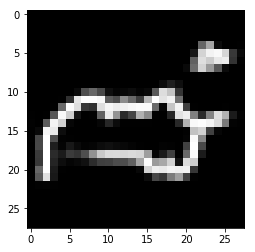

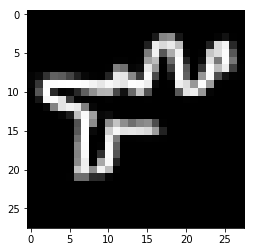

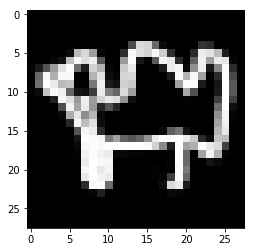

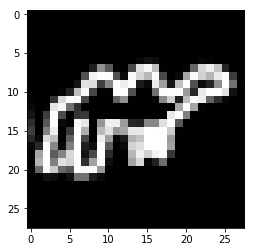

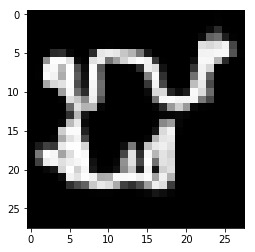

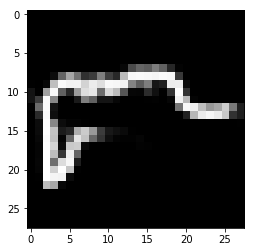

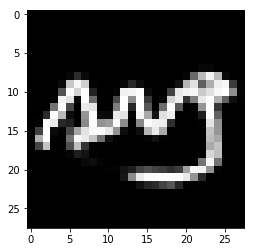

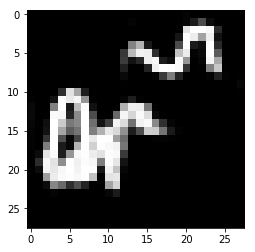

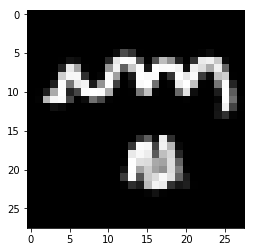

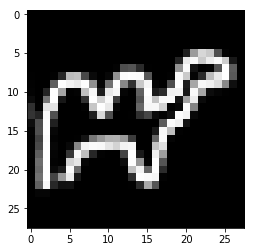

In [18]:
for i in range(images.shape[0]):
    plt.imshow(images[i, :, :, 0], cmap = 'gray')
    plt.show()